# Aeropolis 🚁


# Import packages

We start by importing the necessary libraries for building, evaluating, and optimizing machine learning models, preprocessing data, handling missing values, and visualizing results effectively.

In [315]:
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression



# Exploratory data analysis (EDA) 📝

We begin our analysis with Exploratory Data Analysis (EDA), a critical first step in understanding the dataset. This process helps reveal the structure of the data, identify unusual values, and uncover patterns using visual tools like graphs and charts. EDA also plays a key role in ensuring the data is clean and reliable for further analysis. By carefully examining the data, we can avoid mistakes and improve the performance of our predictive models.

## Data Overview and Initial Inspection 📑

We start by loading the Dataset, therefore we read our CSV file (aeropolis.csv) into a Pandas DataFrame (`aeropolis_df_original`).

In [316]:
aeropolis_df_original = pd.read_csv("/Users/mmaggiora/Desktop/projectAI/aeropolis.csv")

We create a copy of the original dataset (`aeropolis_df_original`) and assigned it to **`aeropolis_df`** to ensures that the original dataset remains unaltered during the analysis/modification process.

In [317]:
aeropolis_df = aeropolis_df_original.copy() 

We analyze the data dimensions by printing the number of rows and columns using the ***.shape*** function, which returns a tuple representing the dataset's shape.

In our case, the dataset contains 1 million records with 20 features.

In [318]:
print(f"Number of rows and columns: {aeropolis_df.shape}")

Number of rows and columns: (1000000, 20)


We now analyze the data types and missing values.

To do this, we use the ***.info()*** function that provides a concise summary of the DataFrame. 

In fact, we get:
- Column names: The list of all features in the dataset.
- Data types: Specifies the type of each column, such as object for categorical features and float64 for numerical features.
- Number of non-null entries per column: This indicates the number of valid (non-missing) data points in each column, highlighting columns with potential missing data.
- Memory usage: Shows the amount of memory consumed by the dataset.

In the output, we observe that the dataset has 1,000,000 rows with 20 columns, of which 9 are of type object and 11 are of type float64. 
The number of non-null entries reveals that all the columns, have missing values that will need to be handled during preprocessing.


In [319]:
print("Data Types and Missing Values:")
aeropolis_df.info()

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Cargo_Capacity_kg              899767 non-null  float64
 1   Air_Temperature_Celsius        900236 non-null  float64
 2   Weather_Status                 899826 non-null  object 
 3   Package_Type                   899579 non-null  object 
 4   Vertical_Landing               900434 non-null  object 
 5   Equipment_Cost                 900197 non-null  float64
 6   Market_Region                  899887 non-null  object 
 7   Flight_Duration_Minutes        900047 non-null  object 
 8   Terrain_Type                   900329 non-null  object 
 9   Water_Usage_liters             900344 non-null  float64
 10  Flight_Hours                   900273 non-null  float64
 11  Delivery_Time_Minutes          900036 non-null  float64
 12

## Dataset Description 📊


We use the function ***.head()*** to extract the first 10 rows of our dataset. This helps us better understand the meaning and structure of the columns.


The output displays the first 10 rows, showing how the data is organized. We can also observe missing values (NaNs) in several columns, which highlights the need for further data cleaning and imputation steps.

In [320]:
print(aeropolis_df.head(10).to_string())

   Cargo_Capacity_kg  Air_Temperature_Celsius Weather_Status Package_Type Vertical_Landing  Equipment_Cost  Market_Region Flight_Duration_Minutes Terrain_Type  Water_Usage_liters  Flight_Hours  Delivery_Time_Minutes  Cleaning_Liquid_Usage_liters Climate_Zone Quantum_Battery Flight_Zone  Autopilot_Quality_Index  Vertical_Max_Speed  Wind_Speed_kmph  Route_Optimization_Per_Second
0           4.270384                32.241410         Cloudy        Maize        Supported        36563.84          Local                   False          NaN             5831.79         164.0                  112.0                         86.49         Arid           False        East                     0.39               412.0       756.205234                         651.62
1           5.120852                24.635445          Sunny       Cotton        Supported        29156.29          Local                   False        Sandy                 NaN         160.0                    NaN                         

##### General Description of each feature that we have:

- **Cargo_Capacity_kg:** The amount of cargo the drone can carry in kilograms per flight.  
- **Air_Temperature_Celsius:** The air temperature during the drone's flight, measured in Celsius.  
- **Weather_Status:** The current weather conditions during the drone's operation (**Cloudy, Sunny, Rainy**).  
- **Package_Type:** The type of package or cargo the drone is delivering (**Maize, Cotton, Barley, Soybean, Wheat, Rice**).  
- **Vertical_Landing:** Indicates if the drone uses vertical landing capability (**Supported, Unknown, Unsupported**).  
- **Equipment_Cost:** The cost of the drone equipment.  
- **Market_Region:** The geographical market where the drone operates (**Local, International, National**).  
- **Flight_Duration_Minutes:** The total duration of the flight, measured in minutes (**True, False**).  
- **Terrain_Type:** The type of terrain over which the drone flies (**Sandy, Clay, Loam, Chalky, Silt, Peaty**).  
- **Water_Usage_liters:** The amount of water used by the drone during the flight, in liters.  
- **Flight_Hours:** The cumulative flight hours logged by the drone.  
- **Delivery_Time_Minutes:** The total time taken for the drone to complete the delivery.  
- **Cleaning_Liquid_Usage_liters:** The amount of cleaning liquid used by the drone for maintenance.  
- **Climate_Zone:** The climate zone in which the drone is operating (**Arid, Temperate, Polar, Tropical**).  
- **Quantum_Battery:** Indicates if the drone uses a quantum-powered battery (**False, True**).  
- **Flight_Zone:** The operational zone where the drone conducts its flights (**East, North, West, South**).  
- **Autopilot_Quality_Index:** A rating of the autopilot system's performance.  
- **Vertical_Max_Speed:** The maximum vertical speed the drone can achieve.  
- **Wind_Speed_kmph:** The wind speed during the drone's flight, measured in kilometers per hour.  
- **Route_Optimization_Per_Second:** The number of route optimizations performed per second by the drone's navigation system.  

The ***.describe(include='object')*** method summarizes the **categorical data** in the dataset.

This output helps us understand the distribution and variability of categorical data in the dataset, highlighting potential areas for cleaning, such as unknown or missing values.


In [321]:
aeropolis_df.describe(include='object')

,Weather_Status,Package_Type,Vertical_Landing,Market_Region,Flight_Duration_Minutes,Terrain_Type,Climate_Zone,Quantum_Battery,Flight_Zone
count,899826,899579,900434,899887,900047,900329,899823,900007,899843
unique,3,6,3,3,2,6,4,2,4
top,Rainy,Barley,Unknown,Local,False,Loam,Tropical,True,West
freq,300174,150119,300452,300377,450760,150532,225783,450103,225039


The ***.describe()*** method is used to summarize the **numerical data** in the dataset.

This output provides valuable insights into the distribution and scale of each feature and highlights potential data quality issues, such as negative values for water usage or cargo capacity, which may require further investigation or cleaning.


In [322]:
aeropolis_df.describe()

,Cargo_Capacity_kg,Air_Temperature_Celsius,Equipment_Cost,Water_Usage_liters,Flight_Hours,Delivery_Time_Minutes,Cleaning_Liquid_Usage_liters,Autopilot_Quality_Index,Vertical_Max_Speed,Wind_Speed_kmph,Route_Optimization_Per_Second
count,899767.000000,900236.000000,900197.000000,900344.000000,900273.000000,900036.000000,899602.000000,900189.000000,899779.000000,900212.000000,899614.000000
mean,4.649776,27.502480,29987.480920,4999.072438,149.994980,104.482616,50.092852,0.500285,299.315963,550.079136,999.718546
std,1.696381,7.220540,11548.037346,1500.069589,12.254514,25.944757,50.073233,0.288772,115.499584,259.809348,199.873344
min,-1.147613,15.000041,10000.140000,-2323.700000,95.000000,60.000000,0.000000,0.000000,100.000000,100.000896,-133.070000
25%,3.418913,21.252947,19972.210000,3987.087500,142.000000,82.000000,14.450000,0.250000,199.000000,325.135896,864.782500
50%,4.651655,27.504887,29986.650000,4997.685000,150.000000,104.000000,34.730000,0.500000,299.000000,550.349457,999.750000
75%,5.878848,33.751600,39990.970000,6011.532500,158.000000,127.000000,69.427500,0.750000,399.000000,774.780272,1134.480000
max,9.963372,39.999997,49999.990000,13104.200000,213.000000,149.000000,716.380000,1.000000,499.000000,999.998098,1999.670000


## Data Exploration and Cleaning 🧐



From the analyis that we've prevously made, we can see that the values in the values in the `Flight_Duration_Minutes` column are inconsistent, as they are stored as booleans (True or False) instead of numeric values (integers or floats). This provides no meaningful information about the flight duration.

To avoid potential issues, we will remove this column and ignore this data moving forward.

In [323]:
aeropolis_df.drop('Flight_Duration_Minutes', axis = 1, inplace=True)

We check if our dataset has been correctly cleaned by displaying a sample of the actual dataset.

In [324]:
aeropolis_df.sample(10)

,Cargo_Capacity_kg,Air_Temperature_Celsius,Weather_Status,Package_Type,Vertical_Landing,Equipment_Cost,Market_Region,Terrain_Type,Water_Usage_liters,Flight_Hours,Delivery_Time_Minutes,Cleaning_Liquid_Usage_liters,Climate_Zone,Quantum_Battery,Flight_Zone,Autopilot_Quality_Index,Vertical_Max_Speed,Wind_Speed_kmph,Route_Optimization_Per_Second
631881,4.505078,22.467304,Cloudy,Maize,Supported,33342.49,Local,Silt,NaN,153.0,85.0,89.11,Arid,True,West,0.72,245.0,513.940124,959.64
246176,4.179099,18.659316,Rainy,Barley,Unknown,15301.65,National,Loam,6872.35,153.0,138.0,54.64,Tropical,True,North,0.74,384.0,NaN,1253.38
517904,7.514454,38.705677,Rainy,Soybean,Supported,29483.03,National,NaN,4680.25,128.0,138.0,NaN,Arid,True,South,0.55,398.0,NaN,NaN
476285,1.414532,27.575114,Cloudy,Rice,Unknown,24659.65,Local,Clay,6642.54,155.0,107.0,39.00,Temperate,False,West,0.20,146.0,221.763670,936.93
920864,8.615595,27.020221,Sunny,NaN,Unsopported,32297.42,International,Sandy,5746.89,143.0,78.0,18.43,Temperate,True,North,0.02,323.0,988.337317,1208.84
526501,2.954279,37.197911,Rainy,Cotton,Supported,49102.28,Local,Sandy,4419.84,162.0,70.0,37.72,Tropical,True,West,0.01,293.0,243.062498,NaN
82594,1.038870,27.649363,Cloudy,Cotton,Unknown,15741.91,International,NaN,5613.87,NaN,100.0,39.80,Arid,False,North,0.24,NaN,267.684330,1321.77
877411,5.979687,32.349929,Rainy,NaN,Unsopported,32805.98,National,Loam,1951.53,NaN,90.0,47.93,Temperate,True,North,0.43,339.0,NaN,677.37
22298,1.680609,16.967386,NaN,Soybean,Unknown,43904.48,Local,Chalky,3364.51,153.0,75.0,1.35,Polar,False,South,NaN,116.0,360.886234,932.95
603746,3.652772,25.379074,Cloudy,Rice,Unknown,22069.22,International,Sandy,NaN,NaN,65.0,32.64,Temperate,False,North,0.75,394.0,483.442678,750.16


### In Depth-Analysis of each column 🔬

To make a better analysis, we need to separate the categorical and numerical columns.

Therefore, we separately store the categorical and numerical features in two different DataFrames. The categorical features are selected using the `.select_dtypes(include=['object', 'category'])` method, while the numerical features are selected using `.select_dtypes(include=['int64', 'float64'])`.

We can see that the vast majority of our features are numerical variables, with 11 numerical columns compared to 8 categorical ones.

In [325]:
#Selecting categoricalfeatures
categorical_data = aeropolis_df.select_dtypes(include=['object', 'category'])
#append the features of categorical_data to list
categorical_columns = categorical_data.columns.tolist()

##Selecting numerical features
numerical_data = aeropolis_df.select_dtypes(include=['int64', 'float64'])
#append the features of numerical_data to list
numerical_columns = numerical_data.columns.tolist()

print(f'There are {len(numerical_columns)} numerical features:')
print(numerical_columns, '\n')
print(f'There are {len(categorical_columns)} categorical features:')
print(categorical_columns)

There are 11 numerical features:
['Cargo_Capacity_kg', 'Air_Temperature_Celsius', 'Equipment_Cost', 'Water_Usage_liters', 'Flight_Hours', 'Delivery_Time_Minutes', 'Cleaning_Liquid_Usage_liters', 'Autopilot_Quality_Index', 'Vertical_Max_Speed', 'Wind_Speed_kmph', 'Route_Optimization_Per_Second'] 

There are 8 categorical features:
['Weather_Status', 'Package_Type', 'Vertical_Landing', 'Market_Region', 'Terrain_Type', 'Climate_Zone', 'Quantum_Battery', 'Flight_Zone']


We now want to study the range of numerical variables by examining their minimum and maximum values, and explore the unique values each categorical variable can assume in the dataset. 

**Analysis of the output:**

-   **Categorical Variables**: The output shows the unique values that each categorical variable can assume, including any missing values (nan). This allows us to verify the categories, detect any invalid entries, and plan for necessary data cleaning steps, especially for features with unexpected categories or missing values.

-   **Numerical Variables**: By displaying the range of each numerical column (from min to max), we can identify inconsistencies such as negative values in columns where they don’t logically belong (e.g., `Cargo_Capacity_kg`, `Water_Usage_liters`, and `Route_Optimization_Per_Second`). These anomalies should be addressed in the data preprocessing phase to ensure the integrity of the analysis.


In [326]:
print("The range of numerical variables is:", '\n')
for col in numerical_columns:
    print(f"{col}: From: {aeropolis_df[col].min()}, To: {aeropolis_df[col].max()}")
print('\n')
print("The values that the categorical variables can assume are:", '\n')
for col in categorical_columns:
    print(f"{col}: {aeropolis_df[col].unique()}")


The range of numerical variables is: 

Cargo_Capacity_kg: From: -1.147613222534901, To: 9.963372228814649
Air_Temperature_Celsius: From: 15.000040591287036, To: 39.99999662316004
Equipment_Cost: From: 10000.14, To: 49999.99
Water_Usage_liters: From: -2323.7, To: 13104.2
Flight_Hours: From: 95.0, To: 213.0
Delivery_Time_Minutes: From: 60.0, To: 149.0
Cleaning_Liquid_Usage_liters: From: 0.0, To: 716.38
Autopilot_Quality_Index: From: 0.0, To: 1.0
Vertical_Max_Speed: From: 100.0, To: 499.0
Wind_Speed_kmph: From: 100.00089622522204, To: 999.998098221668
Route_Optimization_Per_Second: From: -133.07, To: 1999.67


The values that the categorical variables can assume are: 

Weather_Status: ['Cloudy' 'Sunny' nan 'Rainy']
Package_Type: ['Maize' 'Cotton' 'Barley' 'Soybean' 'Wheat' nan 'Rice']
Vertical_Landing: ['Supported' 'Unknown' nan 'Unsopported']
Market_Region: ['Local' 'International' nan 'National']
Terrain_Type: [nan 'Sandy' 'Clay' 'Loam' 'Chalky' 'Silt' 'Peaty']
Climate_Zone: ['Arid' 'Te

#### Handeling inconsistent datas ⚙️

In this step, we handle the issue of negative values in certain numerical features. 

In [327]:
negative_values_count = {}

# Loop through numerical columns to find negative values
for col in numerical_columns:
    negative_values_count[col] = (aeropolis_df[col] < 0).sum()

# Display the result
print("Number of negative values in each numerical column:\n")
for col, count in negative_values_count.items():
    print(f"{col}: {count}")

Number of negative values in each numerical column:

Cargo_Capacity_kg: 209
Air_Temperature_Celsius: 0
Equipment_Cost: 0
Water_Usage_liters: 421
Flight_Hours: 0
Delivery_Time_Minutes: 0
Cleaning_Liquid_Usage_liters: 0
Autopilot_Quality_Index: 0
Vertical_Max_Speed: 0
Wind_Speed_kmph: 0
Route_Optimization_Per_Second: 1


We replaced the negative values in the dataset with `NaN` for features where negative values are invalid, such as `Cargo_Capacity_kg`, `Route_Optimization_Per_Second` and `Water_Usage_liters`. This was done using the ***.apply()*** function with a lambda expression, which checks for negative values and replaces them with NaN. This approach allows us to maintain data integrity by marking erroneous values as missing. Later, we will proceed with handling and imputing the missing values.

In [328]:
for col in numerical_columns:
    aeropolis_df[col] = aeropolis_df[col].apply(lambda x: np.nan if x < 0 else x)


Let's verify that we've correctly replaced all inconsistent datas. 

In [329]:
negative_values_count = {}

# Loop through numerical columns to find negative values
for col in numerical_columns:
    negative_values_count[col] = (aeropolis_df[col] < 0).sum()

# Display the result
print("Number of negative values in each numerical column:\n")
for col, count in negative_values_count.items():
    print(f"{col}: {count}")

Number of negative values in each numerical column:

Cargo_Capacity_kg: 0
Air_Temperature_Celsius: 0
Equipment_Cost: 0
Water_Usage_liters: 0
Flight_Hours: 0
Delivery_Time_Minutes: 0
Cleaning_Liquid_Usage_liters: 0
Autopilot_Quality_Index: 0
Vertical_Max_Speed: 0
Wind_Speed_kmph: 0
Route_Optimization_Per_Second: 0


# Descriptive Statistics 📉
## Column distribution 

####  Analysis of the distribution of numerical columns

The provided histograms with KDE overlays present the distribution of numerical features in the dataset. Each plot highlights the frequency of values for a specific variable, revealing patterns, skewness, and potential outliers.
- Design of our graphs:
    - The number of rows (***n_rows***)in the grid is calculated dynamically to fit all numerical features, ensuring an optimized and clean layout.
    - Gridlines and ***plt.tight_layout()*** ensure visual clarity and alignment across all plots.
    - The histograms are presented in a single view for better comparison of feature distributions.


- We can observe:
    - **Normal Distributions:**
    Features like `Water_Usage_liters`, `Flight_Hours`, and `Route_Optimization_Per_Second` follow a bell-shaped distribution.
    These variables are well-suited for predictive modeling without requiring transformations.
    - **Uniform Distributions:**
    `Delivery_Time_Minutes`, `Autopilot_Quality_Index`, `Vertical_Max_Speed`, and `Wind_Speed_kmph` display uniform patterns, indicating no clustering or biases.
    - **Skewed Distributions:**
    Features like `Cleaning_Liquid_Usage_liters` are heavily right-skewed, indicating that most values are near zero. This could indicate that 0 represents valid operational behavior where no cleaning liquid is used during the flight.



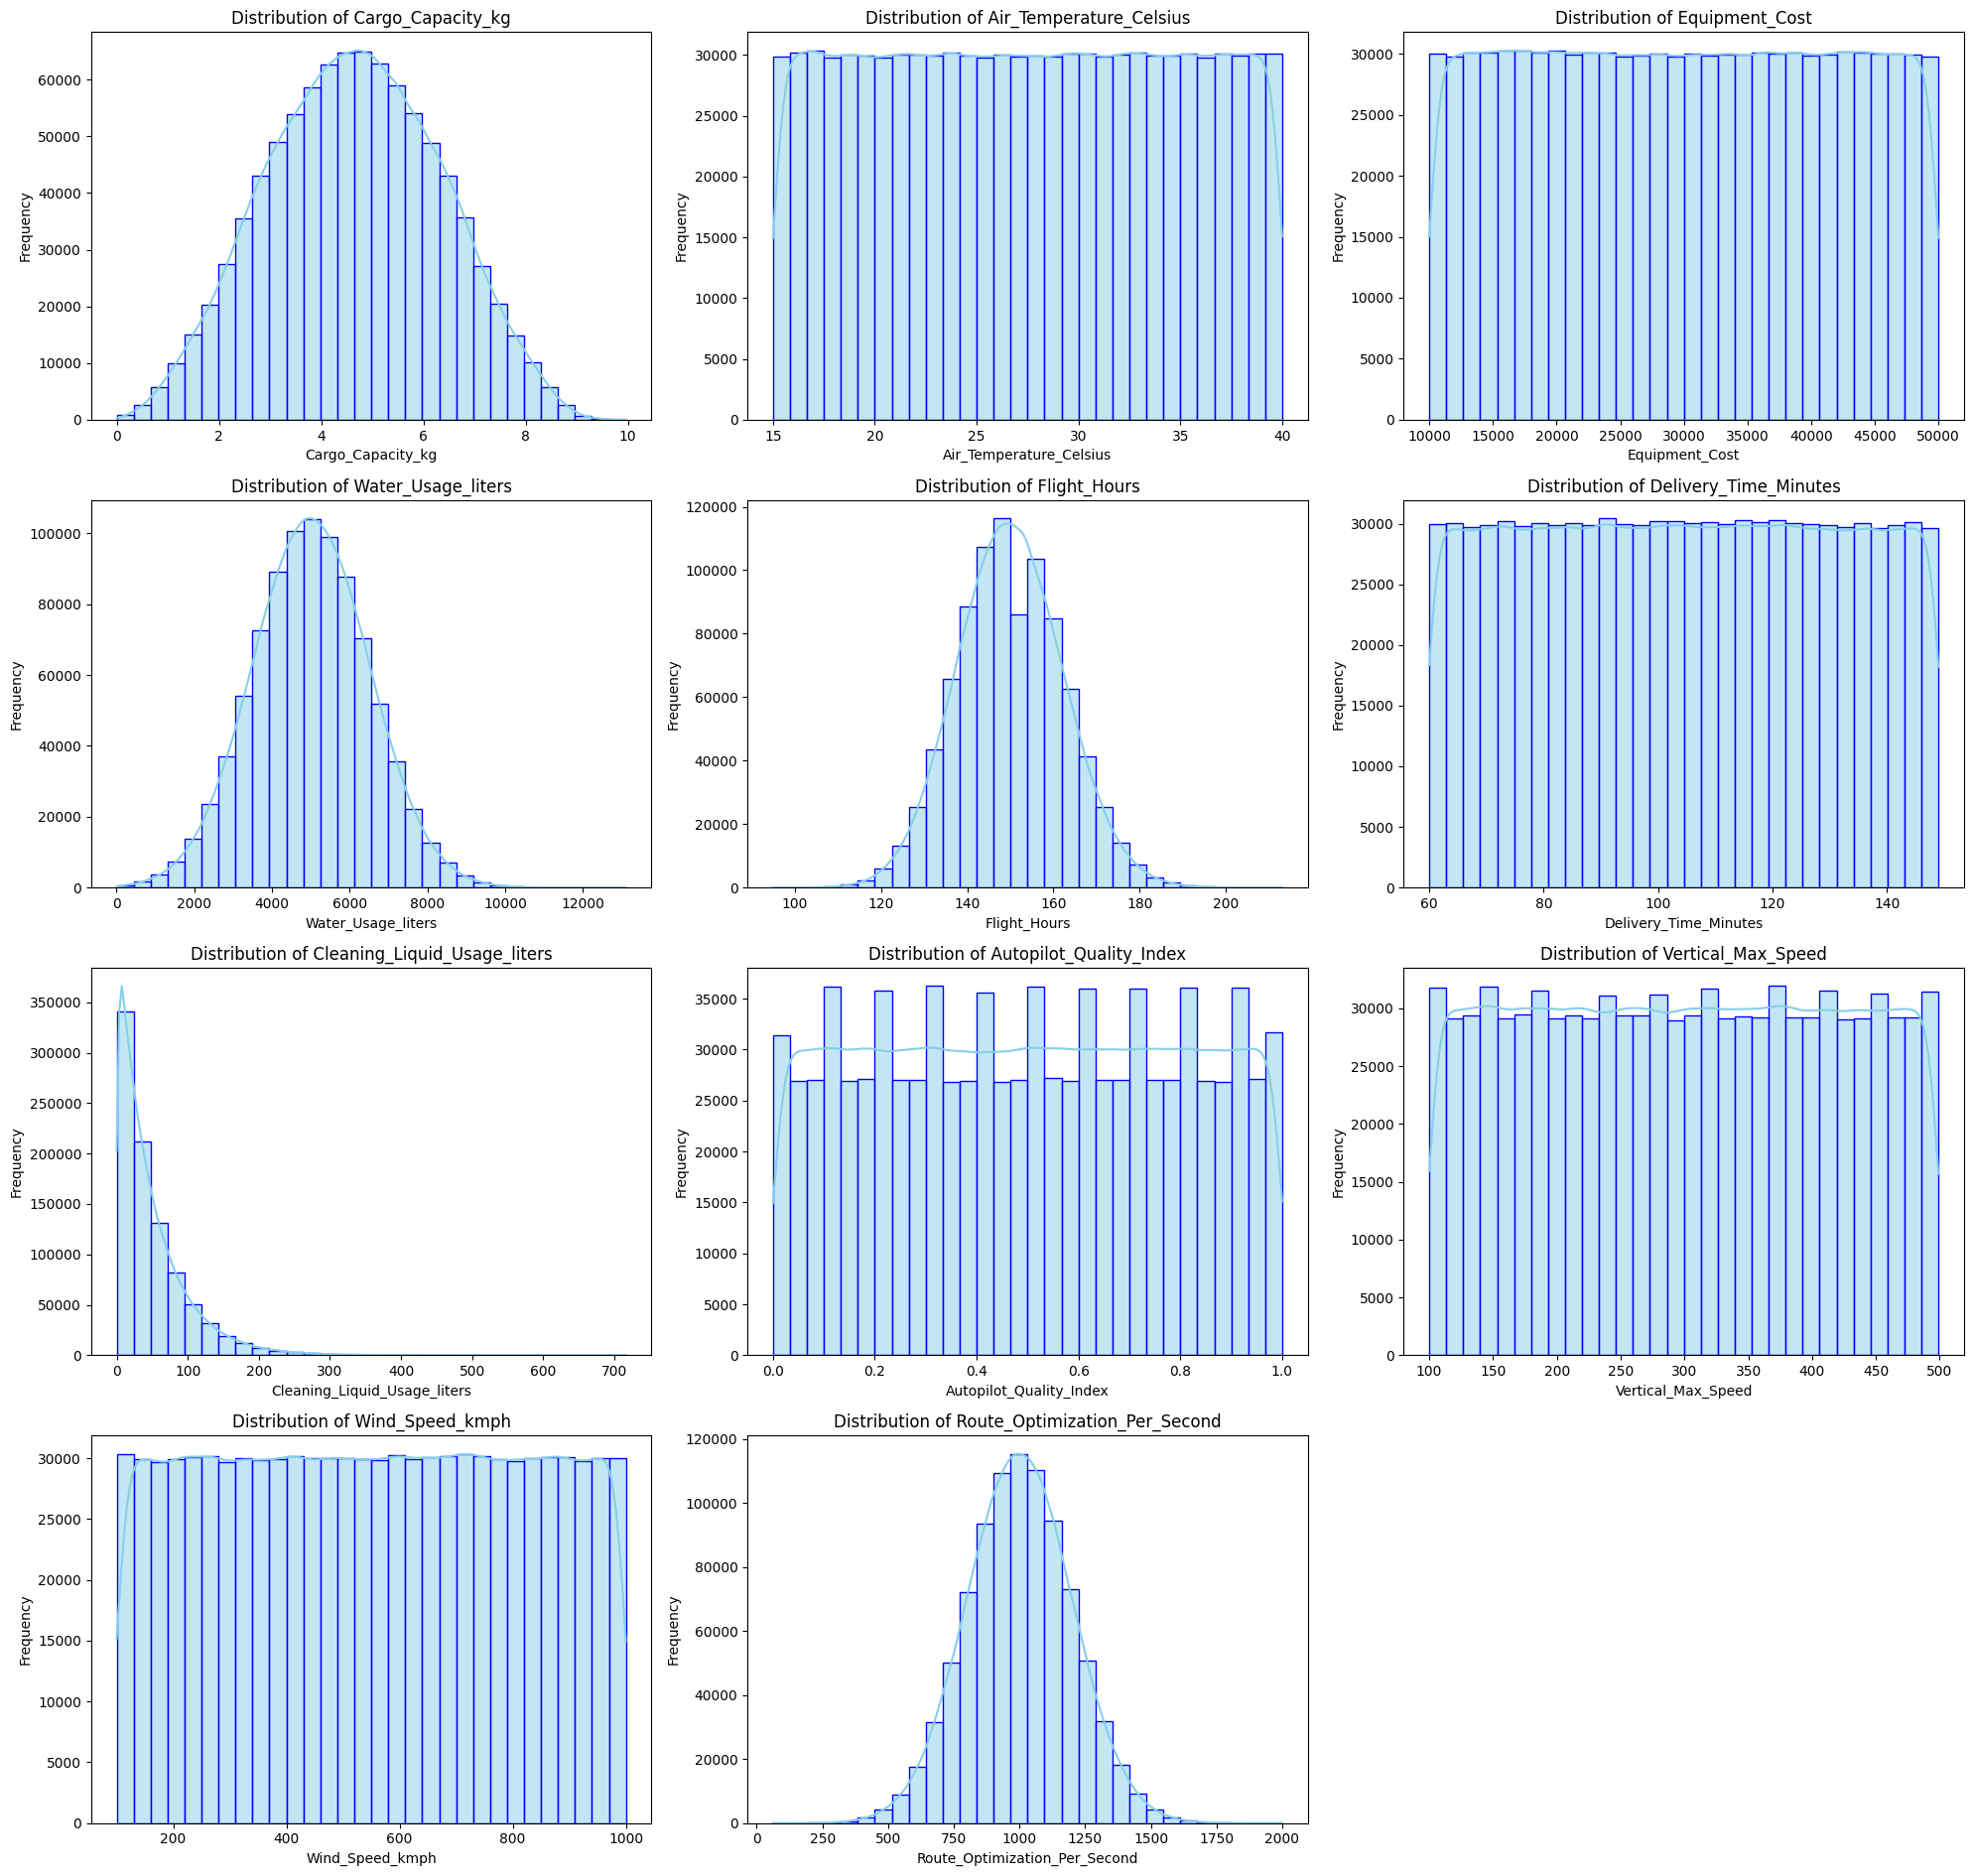

In [330]:
n_cols = 3  # Number of columns in the grid
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols   # Calculate required rows dynamically

# Create a single figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through numerical columns and plot histograms
for idx, col in enumerate(numerical_columns):
    plt.sca(axes[idx])  # Set the current axis
    sns.histplot(aeropolis_df[col], kde=True, color='skyblue',bins=30,  edgecolor='blue', ax=axes[idx])
    axes[idx].set_title(f"Distribution of {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequency")

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Analysis of the distribution of categorical columns

As we can see form the following graph, all categorical features in the dataset exhibit balanced distributions across their respective categories. This balance indicates a well-collected dataset with no significant dominance of any category.
The balanced distributions across all categorical features suggest:
- **Equal Representation:** No single category dominates, reducing potential model bias.
- **Good Data Coverage:** The dataset includes diverse conditions, regions, and operational factors for example. This will help the model to generalize better.
- **Predictive Relevance:** Balanced features are well-suited for training machine learning models without the need for rebalancing or sampling techniques.


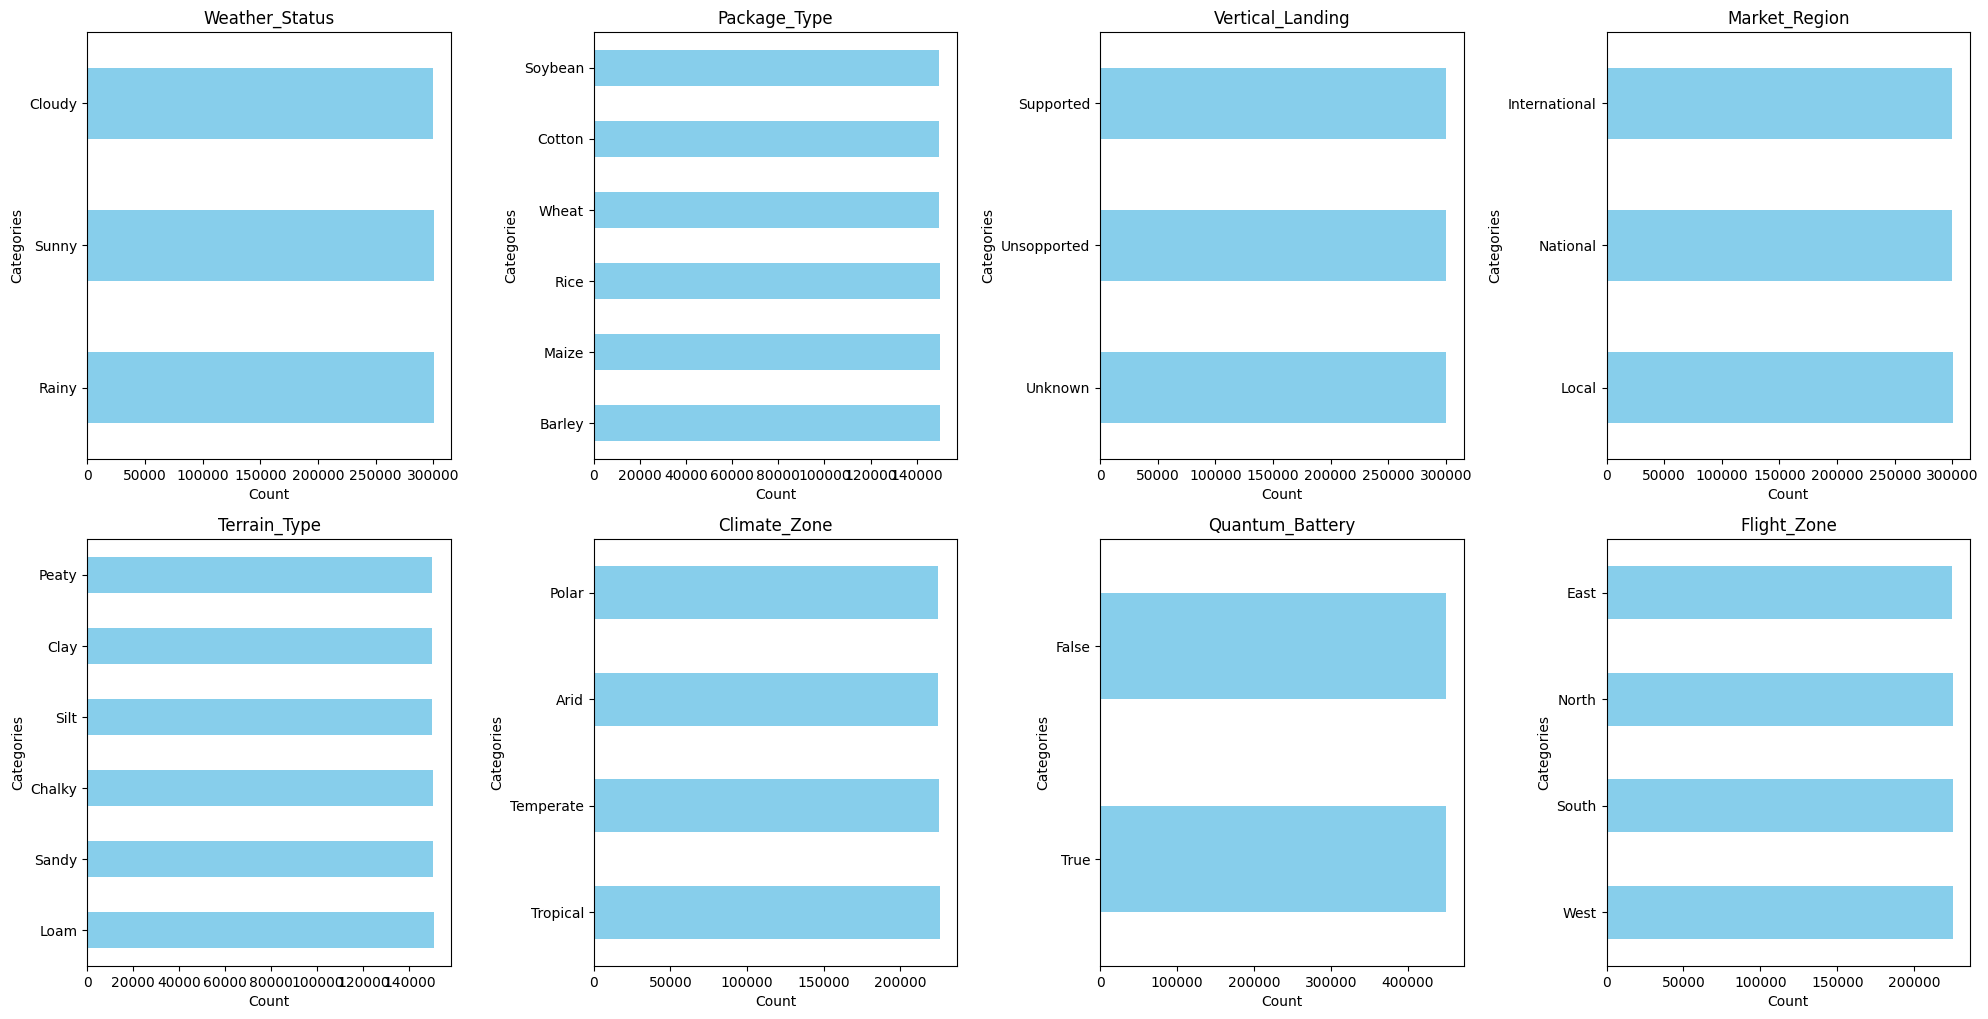

In [331]:
# Determine the number of categorical features
num_features = len(categorical_columns)

# Create a figure with subplots in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the 4x4 grid to a 1D array for easy indexing

# Loop through each categorical feature and create a horizontal bar plot
for i, col in enumerate(categorical_columns):
    categorical_data[col].value_counts().plot(kind='barh', color = 'skyblue', ax=axes[i], title=col)
    axes[i].set_xlabel("Count")  # Optional: Add labels for clarity
    axes[i].set_ylabel("Categories")

# Remove any unused axes (if the number of features is less than 16)
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Investigating the Skeweness of our Numerical features 🔍

We' ll now compute the skweness for each column of the numerical data present in our dataset.

- If the skeweness is between -0.5 and 0.5 the data are fairly simmetrical
- If the skeweness is between -1 and -0.5 or between 0.5 and 1, the data are moderately skewed
- If the skeweness is less than -1 or greater than 1, the data are highly skewed

In [332]:
aeropolis_df[numerical_columns].skew().sort_values(ascending = False)

Cleaning_Liquid_Usage_liters     2.002874
Flight_Hours                     0.078665
Water_Usage_liters               0.018246
Cargo_Capacity_kg                0.002626
Route_Optimization_Per_Second    0.002116
Equipment_Cost                   0.001315
Vertical_Max_Speed               0.000937
Delivery_Time_Minutes            0.000399
Air_Temperature_Celsius         -0.000365
Autopilot_Quality_Index         -0.000958
Wind_Speed_kmph                 -0.001475
dtype: float64

**Analysis of the output:**
We observe that most of our numerical features exhibit low skewness values, indicating near symmetry in their distributions, as seen in the previuous graphs. `Cleaning_Liquid_Usage_liters`, however, is highly skewed to the right, showing a significant asymmetry. All other features are either symmetric or moderately skewed, suggesting their distributions are well-balanced and may not require substantial transformation.

### Handling Skewed Distributions ⚙️
We'll experiment a mathematical transformation on our skewed data to see if we can manage to adjust the distributions to a more or less normal distribution. We do it because some algorithms, like linear regression models benefit from a normal distribution.

Since our data is Right Skewed we use the Log Transform.

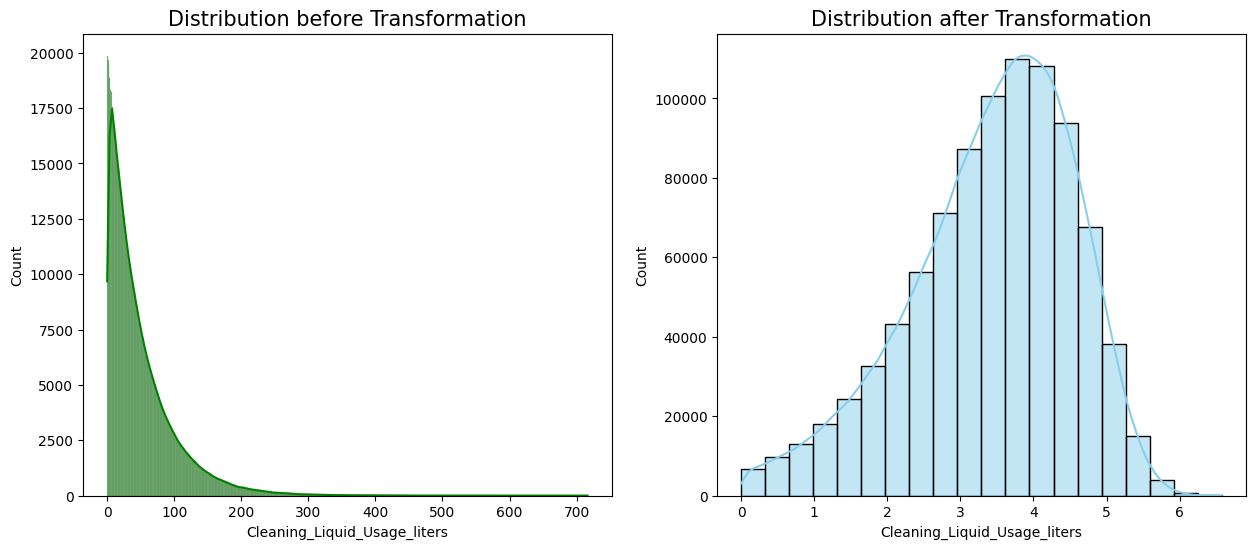

In [333]:
def logTransform(data
                 , feature):
    # Create a copy of the original DataFrame
    data_copy = data.copy()

    # Apply the log transformation to the specified column
    data_copy[feature] = np.log1p(data_copy[feature])

    # Plot the distribution before and after transformation
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(data[feature], kde=True, color="green")

    plt.subplot(1, 2, 2)
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(data_copy[feature], bins=20, kde=True, legend=False, color="skyblue")
    plt.xlabel(feature)
    plt.show()

    return data_copy

aeropolis_copy = aeropolis_df.copy() 

aeropolis_df = logTransform(aeropolis_copy, "Cleaning_Liquid_Usage_liters")

In [334]:
aeropolis_df[numerical_columns].skew().sort_values(ascending = False)

Flight_Hours                     0.078665
Water_Usage_liters               0.018246
Cargo_Capacity_kg                0.002626
Route_Optimization_Per_Second    0.002116
Equipment_Cost                   0.001315
Vertical_Max_Speed               0.000937
Delivery_Time_Minutes            0.000399
Air_Temperature_Celsius         -0.000365
Autopilot_Quality_Index         -0.000958
Wind_Speed_kmph                 -0.001475
Cleaning_Liquid_Usage_liters    -0.579785
dtype: float64

In light of these considerations, the decision was made to forgo the implementation of the log transformation. This choice aims to maintain the fidelity of the original dataset, avoid potential information loss, and prevent adverse effects on the machine learning models. 
## Voire si le mettre

## Identifing missing values 😑


To identify missing values in the dataset, we use the ***.isnull().sum()*** method, which calculates the total number of missing values per column. We then compute the percentage of missing values relative to the total number of rows in each column. This helps us pinpoint columns with significant amounts of missing data, which may require attention during data cleaning.


The output provides a summary of the missing values:
- **Column Name:** Displays the name of the column with missing values.
- **Missing Values:** Shows the total count of missing values in each column.
- **% of Total Values:** Represents the percentage of missing values in each column, helping assess the significance of the missing data.

In [335]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

     # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Our dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


missing_values_table(aeropolis_df)

Our dataframe has 19 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
Cargo_Capacity_kg,100442,10.0
Package_Type,100421,10.0
Cleaning_Liquid_Usage_liters,100398,10.0
Route_Optimization_Per_Second,100387,10.0
Vertical_Max_Speed,100221,10.0
Climate_Zone,100177,10.0
Weather_Status,100174,10.0
Flight_Zone,100157,10.0
Market_Region,100113,10.0
Water_Usage_liters,100077,10.0


Using the ***.matrix()*** function, we display a visual representation of missing values in the dataset. In the graph, white horizontal lines indicate rows with missing values for certain columns, with the frequency of these lines corresponding to the amount of missing data in those columns. The black bars represent non-missing values. 

From the plot, we observe that each most of the rows contain missing data in at least one attribute, highlighting the extent of missing values throughout the dataset.


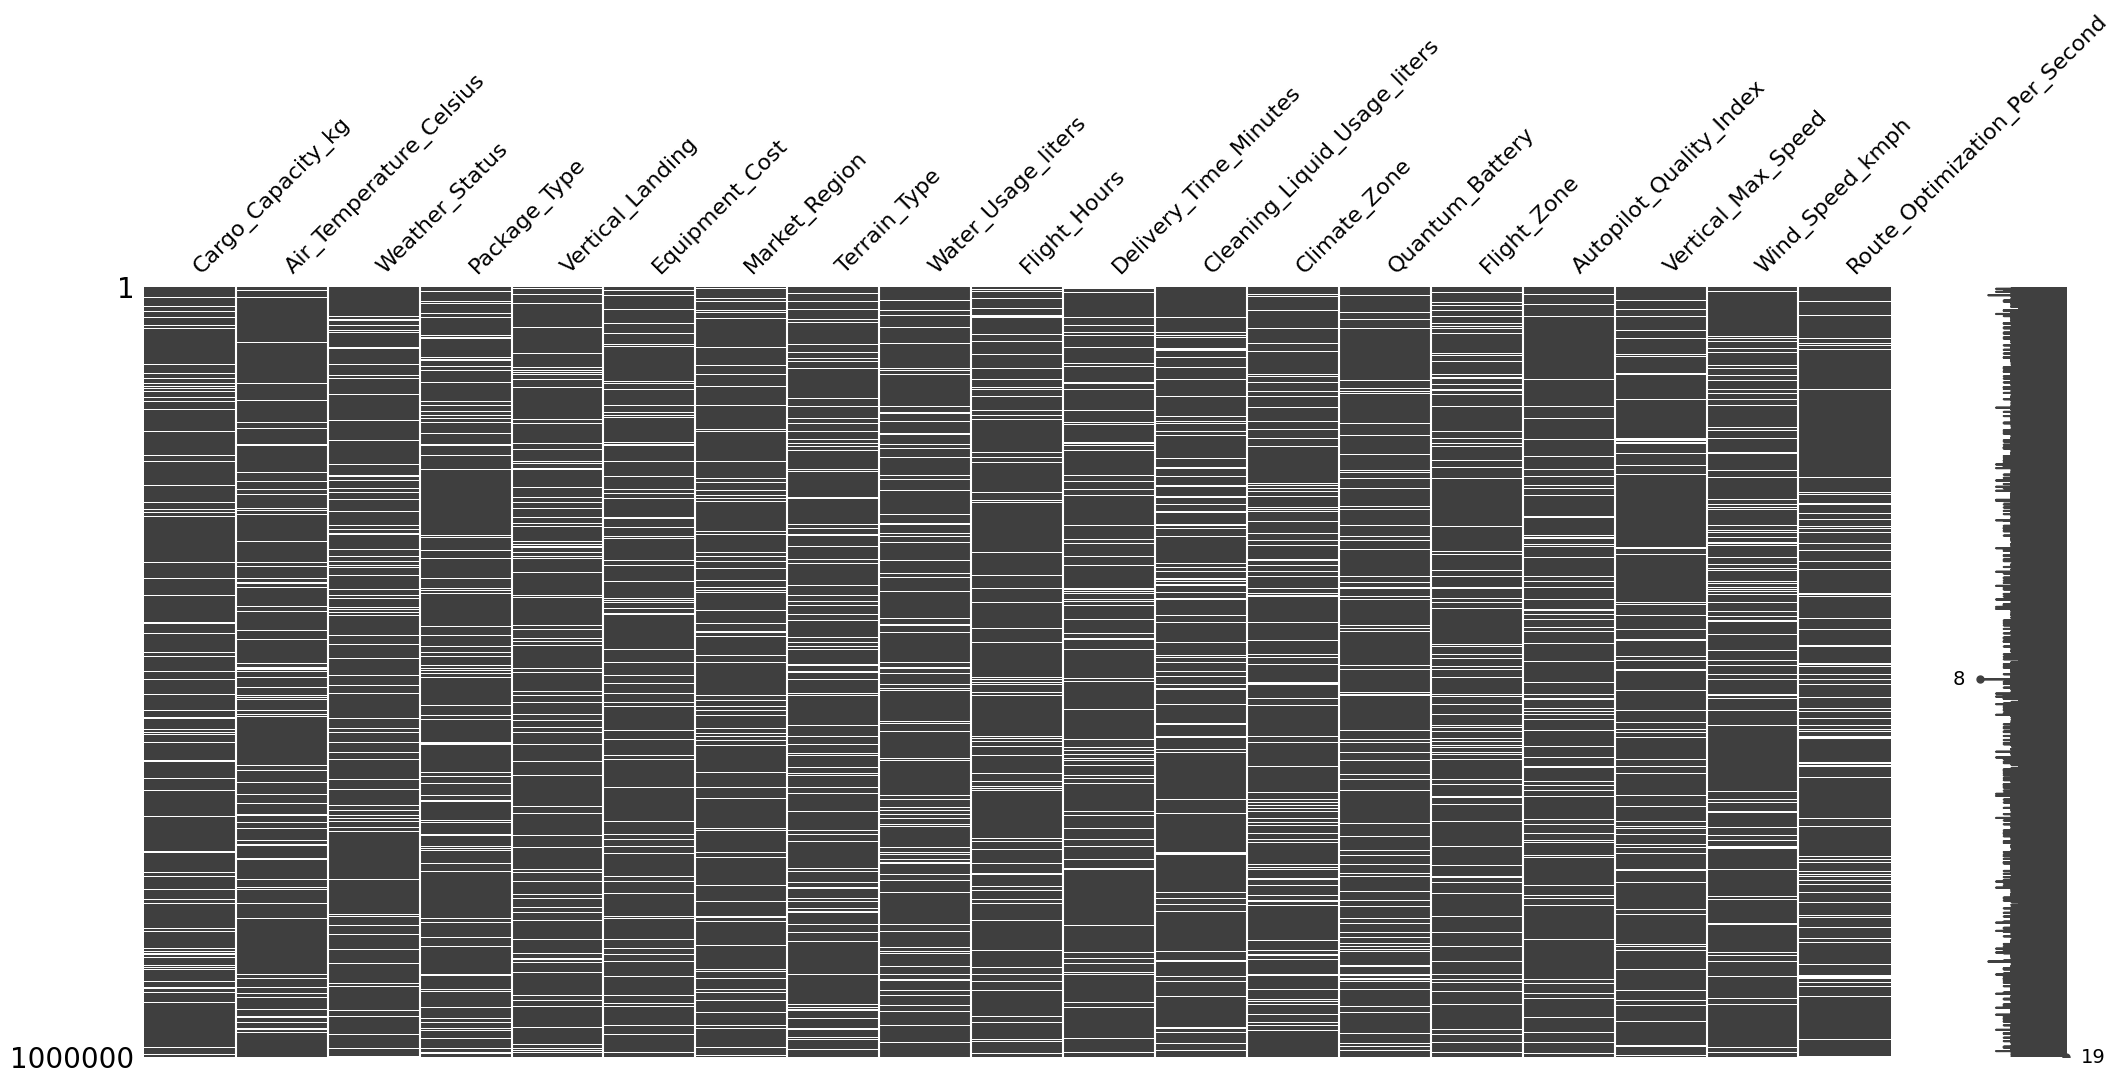

In [336]:
msno.matrix(aeropolis_df)
plt.show()

We now investigate how missing values are distributed across the rows of the dataset.

**Missing values per row:**
- Smallest number of missing values: Some rows are complete, containing 0 missing values.
- Largest number of missing values: The row with the most missing values contains 11 missing entries.


**Observations from the Bar Chart:**
- Most rows have between 0 and 3 missing values, with a peak at 1 and 2 missing values.
- Rows with 4 or more missing values are less frequent.
- Very few rows have 6 or more missing values. These are uncommon and make up a small portion of the dataset.

The largest number of missing values in a row: 11
The smallest number of missing values in a row: 0


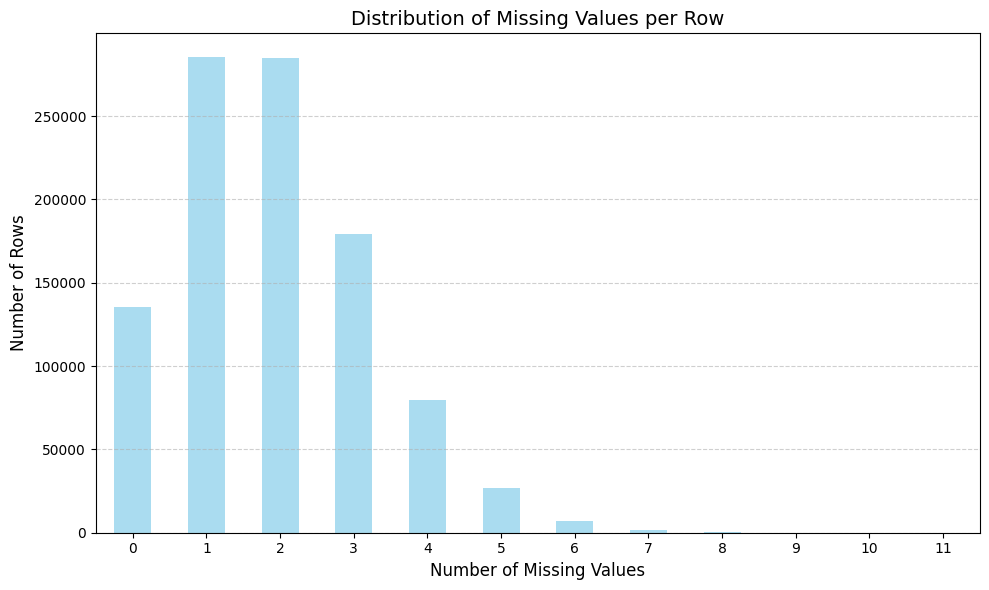

In [337]:
# Calculate the number of missing values per row
missing_values_per_row = aeropolis_df.isnull().sum(axis=1)

# Get summary statistics
max_missing = missing_values_per_row.max()
min_missing = missing_values_per_row.min()

print(f"The largest number of missing values in a row: {max_missing}")
print(f"The smallest number of missing values in a row: {min_missing}")

# Count the frequency of rows with a specific number of missing values
missing_value_counts = missing_values_per_row.value_counts().sort_index()

# Plot the distribution of missing values per row
plt.figure(figsize=(10, 6))
missing_value_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title("Distribution of Missing Values per Row", fontsize=14)
plt.xlabel("Number of Missing Values", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Insights from the Missing Values Correlation Heatmap:**
- **Diagonal Values (1.00)**: Each column is perfectly correlated with itself, which is expected.
- **Off-Diagonal Values (0.00)**: All correlations between different columns are 0.00, indicating that missing values in one column do not co-occur with missing values in another column. This suggests there is no observable relationship or pattern between missingness across features.

From this, we conclude that the missing values appear independently in each column, implying that the data follows a **Missing Completely at Random (MCAR)** pattern.



**Further Investigation:**

By visualizing the missing data, we observe that the pattern of missingness aligns with the available data, confirming that the missing values are random. Thus, we can proceed with handling the missing data using MCAR principles.


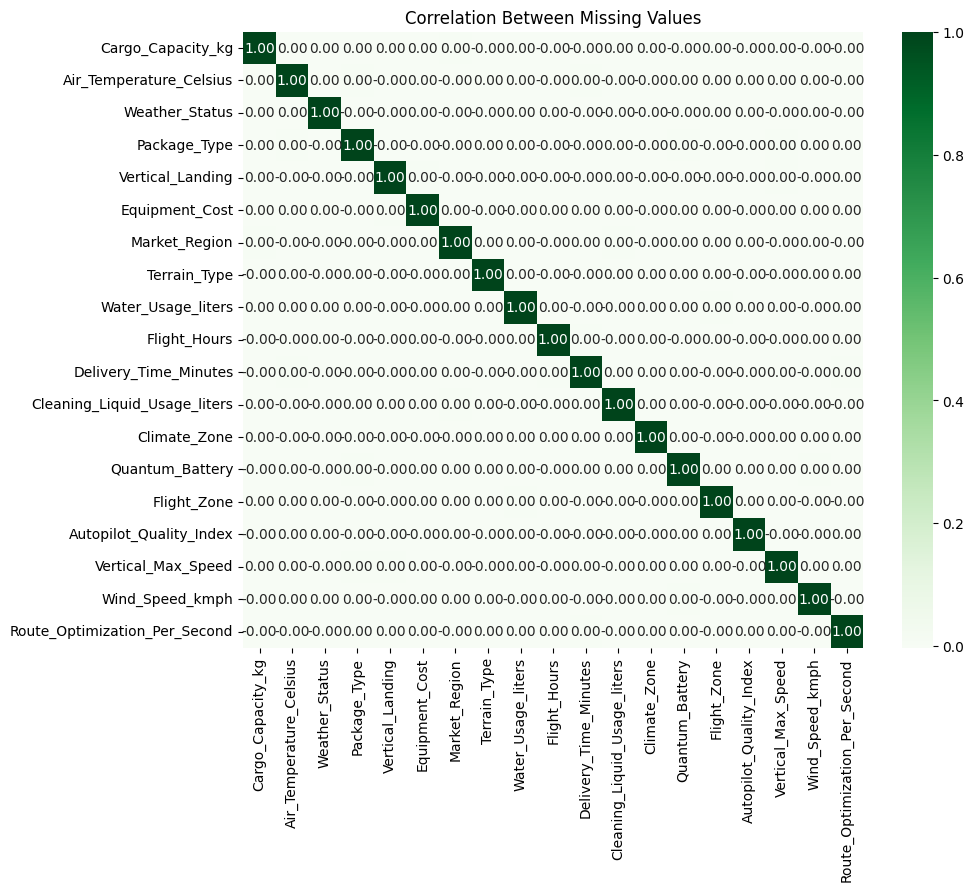

In [338]:
missing_corr = aeropolis_df.isnull().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(missing_corr, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Between Missing Values")
plt.show()

## Handling Missing Values 🛠️

In [339]:
df = aeropolis_df.copy()

In our dataset, the target variable is `Cargo_Capacity_kg`, which is crucial for our analysis. Therefore, it is essential that this feature is not null for any examined drone. To ensure accurate analysis and proper handling of the task, we remove all drones with missing cargo capacity values.

As previously noted, there are 100442 drones with a null value for cargo capacity in the dataset. 
To address this issue, we use the ***.dropna()*** method with the *subset* parameter to remove any rows where `Cargo_Capacity_kg` has missing values. After dropping the rows, we verify using ***.isnull().sum()***, that the number of missing values in the Cargo_Capacity_kg column has been reduced to 0.


In [340]:
print(f"Missing values in Cargo_Capacity_kg: {df['Cargo_Capacity_kg'].isnull().sum()}")
df = df.dropna(subset=['Cargo_Capacity_kg'])

print(f"Missing values in Cargo_Capacity_kg after dropping: {df['Cargo_Capacity_kg'].isnull().sum()}")

Missing values in Cargo_Capacity_kg: 100442
Missing values in Cargo_Capacity_kg after dropping: 0


We handled the missing values in the dataset using the *SimpleImputer* class from *sklearn.impute*.

For numerical features, we used the *SimpleImputer* with the *strategy='median'*. This method replaces missing values with the median of the respective feature. The median is chosen here because it is less sensitive to outliers and is suitable for datasets with a relatively symmetrical distribution. 

For categorical features, we used the *SimpleImputer* with the *strategy='most_frequent'*. This approach fills missing values with the most frequent (mode) value in each column. It is a common technique for categorical data, where the most frequent category is considered the best estimate for missing values. 

By using these strategies, we ensure that missing values are handled appropriately based on the type of data (numerical or categorical), improving the completeness and consistency of the dataset.

In [341]:
# Replace NaN values with the median for numerical features
imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Mode for categorical values
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

We now verify if our dataset has been correctly imputed and if there are no more missing values. 
If the missing values have been properly filled, we should observe a matrix with no white lines, indicating that all missing values have been handled.

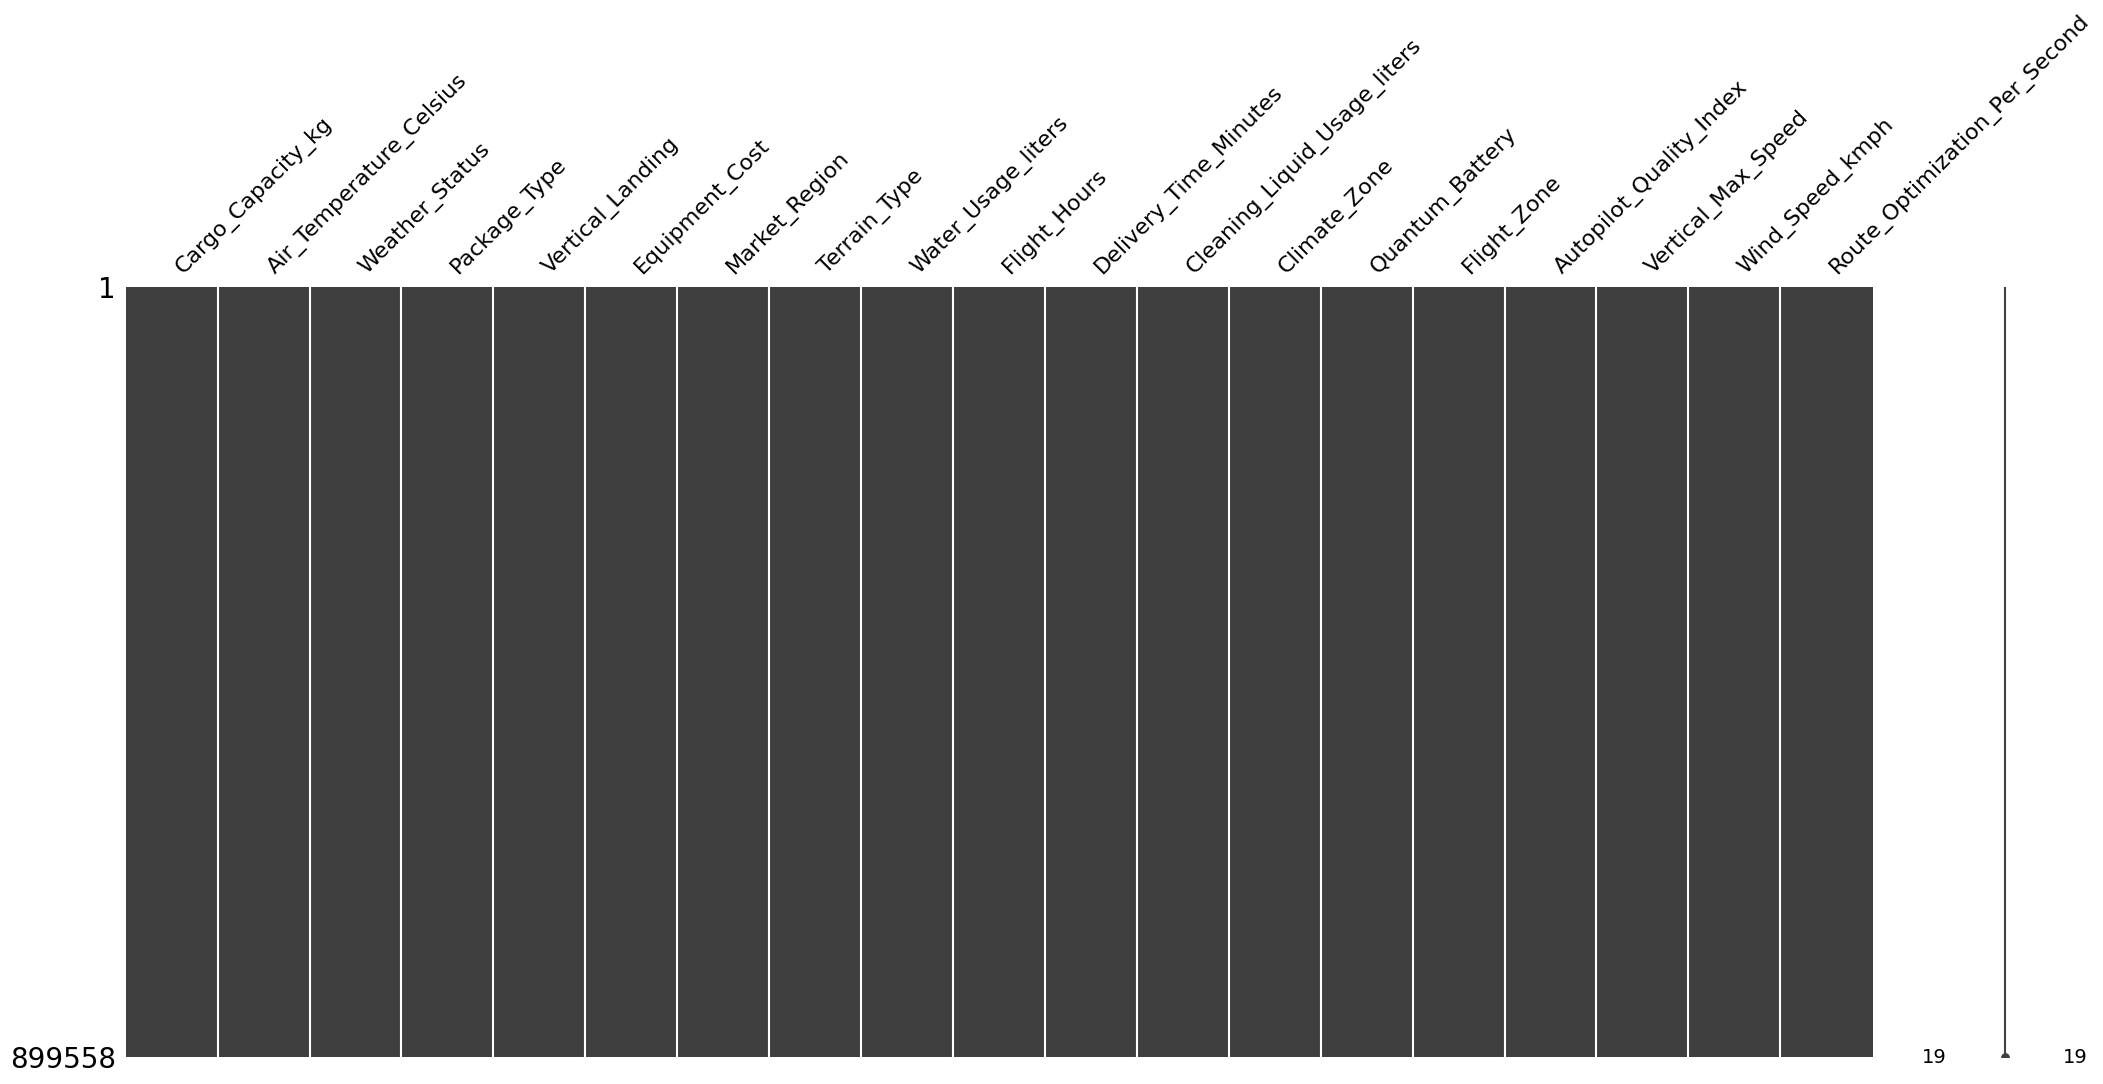

In [342]:
msno.matrix(df)
plt.show()

We've succesfully filled all our datas !

### Encoding Categorical Variables 🔂


Before analyzing the correlation between the variables, it is essential to encode the categorical features into a numerical format. Encoding ensures that machine learning models can process and interpret these variables effectively.

From the dataset, we observe 8 categorical variables. 

We now proceed to encode the categorical variables using **one-hot encoding**. This method creates a new binary column for each category within the categorical feature. We use the ***pd.get_dummies()*** function, which converts each categorical column into a series of binary columns. By setting `drop_first=True`, we avoid the dummy variable trap (multicollinearity) by removing one category per feature.

For features like *True/False* values, one-hot encoding still converts them into a binary format, with **True** becoming **1** and **False** becoming **0**, making the data usable for machine learning models.

In [343]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

In [344]:
df_encoded.sample(2)

,Cargo_Capacity_kg,Air_Temperature_Celsius,Equipment_Cost,Water_Usage_liters,Flight_Hours,Delivery_Time_Minutes,Cleaning_Liquid_Usage_liters,Autopilot_Quality_Index,Vertical_Max_Speed,Wind_Speed_kmph,...,Terrain_Type_Peaty,Terrain_Type_Sandy,Terrain_Type_Silt,Climate_Zone_Polar,Climate_Zone_Temperate,Climate_Zone_Tropical,Quantum_Battery_True,Flight_Zone_North,Flight_Zone_South,Flight_Zone_West
456062,5.019733,38.063280,45666.71,7343.64,148.0,104.0,2.734368,0.80,213.0,589.361297,...,False,False,False,False,True,False,True,True,False,False
667158,4.601661,26.716933,23204.83,3044.99,133.0,104.0,2.860485,0.21,151.0,650.020077,...,False,False,False,True,False,False,True,False,False,False


## Correlation Analysis 🔬

In this analysis, we calculate the correlation matrix of the encoded dataset using the ***.df_encoded.corr()*** function, which computes the pairwise correlations between all numerical features. We then plot the correlation matrix heatmap using ***sns.heatmap()***, which visually represents these correlations. 

By analyzing the heatmap, we can identify which features have strong relationships with the target variable, `Cargo_Capacity_kg`, and other features in the dataset. 
For example, we observe that `Route_Optimization_Per_Second` has a strong negative correlation with `Cargo_Capacity_kg`, while Wind_Speed_kmph and `Cargo_Capacity_kg` show a moderate positive correlation. Additionally, we exclude the correlation of `Cargo_Capacity_kg` with itself to avoid redundancy and focus on the other feature relationships, sorting the correlations by their absolute values for easier interpretation.

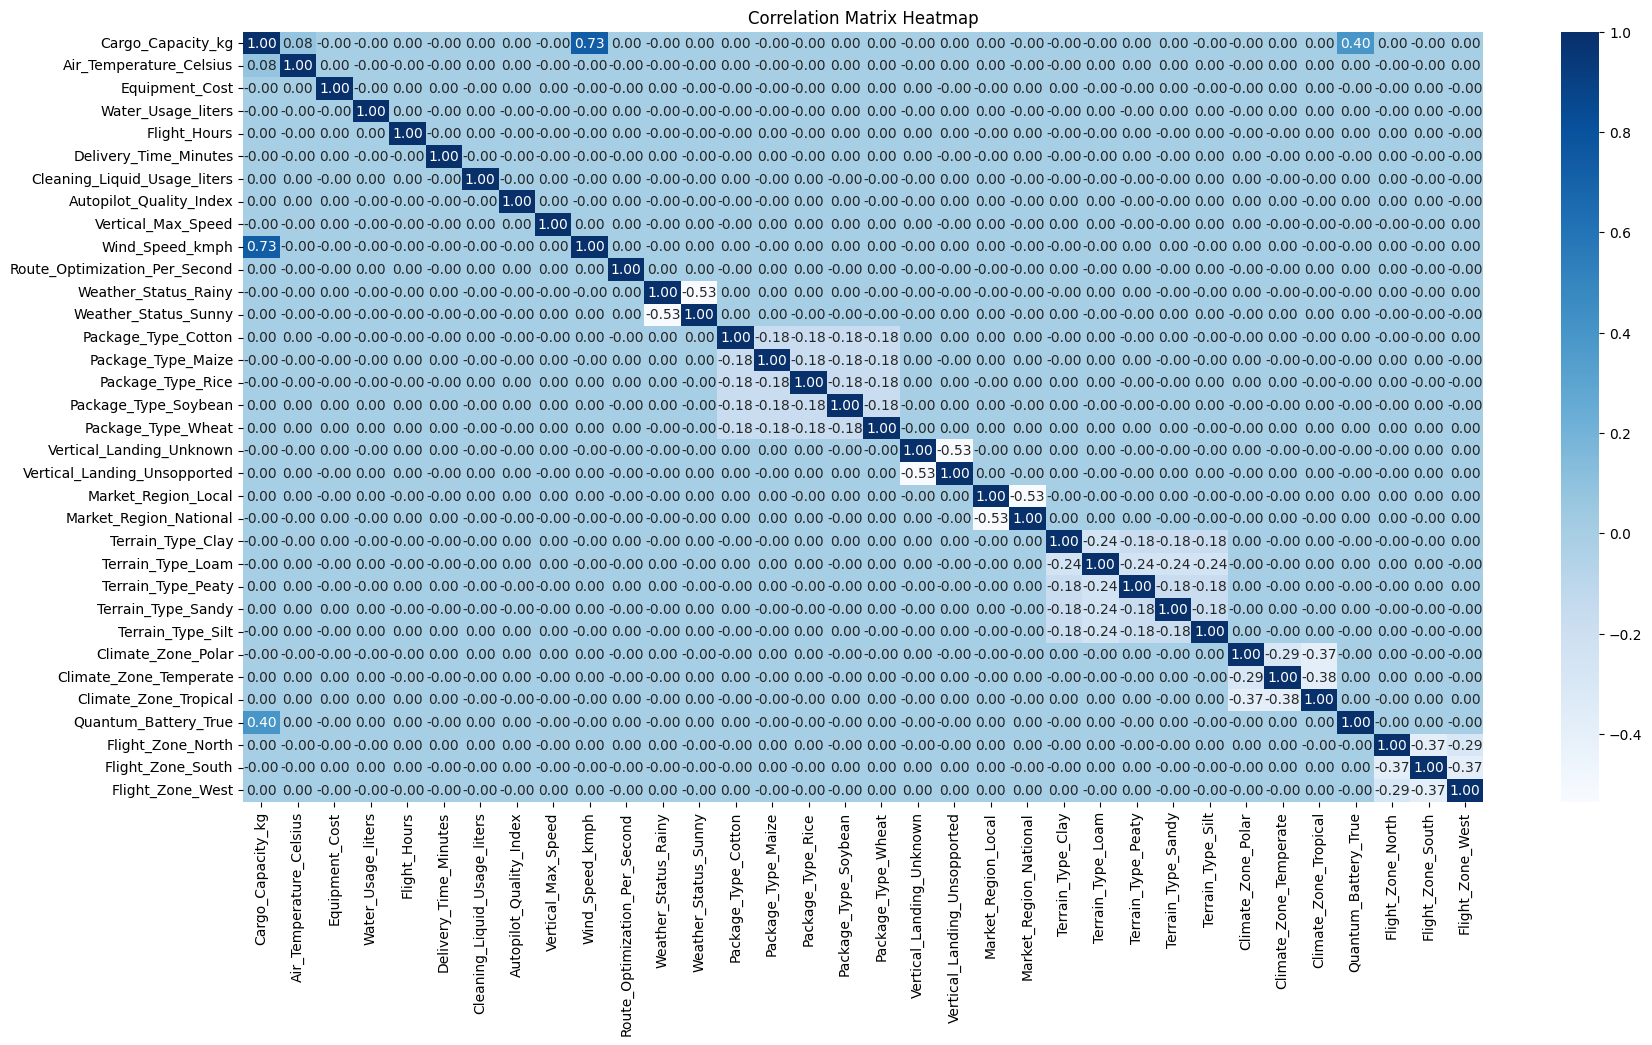

In [345]:
correlation_matrix = df_encoded.corr() # Compute the correlation matrix

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Analyze correlations with target variable 'Cargo_Capacity_kg'
correlations_with_target = correlation_matrix['Cargo_Capacity_kg']
correlations_with_target.drop('Cargo_Capacity_kg', inplace=True)  # Don't want to see the correlation of 'Cargo_Capacity_kg' with itself
correlations_with_target = correlations_with_target.abs().sort_values(ascending=False)  # Only interested in absolute correlations

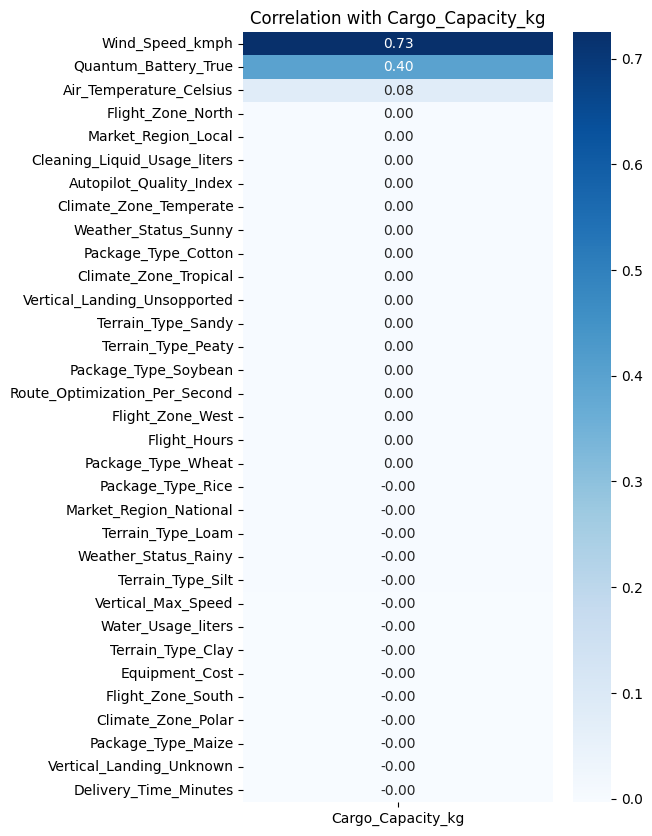

In [346]:
# Specify the target variable
target_variable = 'Cargo_Capacity_kg'

target_corr = correlation_matrix[target_variable].drop(target_variable) 

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target variable
plt.figure(figsize=(5, 10))
sns.heatmap(target_corr_sorted.to_frame(), cmap="Blues", annot=True, fmt='.2f', cbar=True)
plt.title(f'Correlation with {target_variable}')
plt.show()

This chart represents a correlation matrix, specifically showing how different features are correlated with Cargo_Capacity_kg. The color gradient reflects the direction and strength of the correlation between each feature and `Cargo_Capacity_kg`. 

From the graph:
- `Wind_Speed_kmph` shows a strong positive correlation of 0.73 with `Cargo_Capacity_kg`, suggesting that higher wind speeds are associated with higher cargo capacity.
- `Quantum_Battery_True` shows a moderate positive correlation of 0.40, meaning that drones with quantum batteries tend to have a higher cargo capacity.
- `Air_Temperature_Celsius` exhibits a weak positive correlation of 0.08, indicating a minor relationship between air temperature and cargo capacity.
- Other features such as `Route_Optimization_Per_Second`, `Flight_Zone_North`, and `Cleaning_Liquid_Usage_liters` show near-zero correlations, suggesting that these features have little to no impact on `Cargo_Capacity_kg`.

Based on these insights, we can conclude that `Wind_Speed_kmph` and `Quantum_Battery_True` are strong predictors of `Cargo_Capacity_kg`, while features with weak or negligible correlations, such as `Flight_Zone_North`, `Cleaning_Liquid_Usage_liters`, and others, can be considered for exclusion to improve model efficiency.

#### Multivariate Analysis using Mutual Information

However since we aren't in a linear relationship correlation, we must use other techinques to analyze the relationship between the values, and calculate how important each feature is in predicting `Cargo_Capacity_kg`.
## A modifer un peu le texte 

An exaple is the **Mutual Information** is a non-linear method that measures the dependency between two variables. It can capture both linear and non-linear relationships. Mutual information quantifies the amount of information one feature provides about the target.
We can use Mutual Information Regression to calculate the relationship between each feature and the target variable.

We defined the feature matrix X by removing the target variable Cargo_Capacity_kg from the dataset and assigned the target variable to y for supervised machine learning.

In [347]:
# Separate features and target
X = df_encoded.drop('Cargo_Capacity_kg', axis=1)
y = df_encoded['Cargo_Capacity_kg']


In [348]:

# X is the feature matrix and y is the target variable
mi = mutual_info_regression(X, y)

# Create a DataFrame with features and their corresponding MI values
mi_df = pd.DataFrame({"Feature": X.columns, "Mutual Information": mi})

# Sort by MI values
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

<Figure size 3000x2000 with 0 Axes>

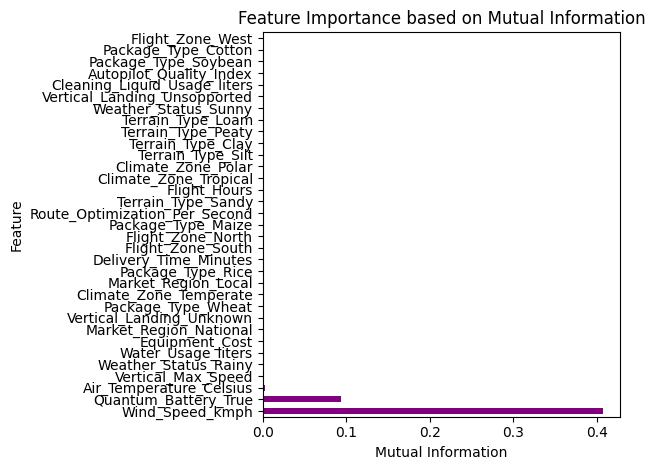

In [ ]:
# Create a figure with larger size
plt.figure(figsize=(30, 20)) 

# Plot the Mutual Information values
mi_df.plot(kind="barh", x="Feature", y="Mutual Information", color="purple", legend=False)

# Customize the plot
plt.xlabel("Mutual Information")
plt.title("Feature Importance based on Mutual Information")
plt.tight_layout()  # Ensures everything fits without overlap
plt.show()

####  Dropping Irrelevant Columns 📛
We can now clean our dataset in function of the most relevant features, to have more efficent analysis. Tehreofre we removee the features that have a MI equal to 0 

In [350]:
features_to_keep = mi_df[mi_df["Mutual Information"] > 0]["Feature"]

# Step 4: Update the feature matrix by removing features with MI = 0
X_cleaned = X[features_to_keep]

# Now, X_cleaned contains only features with non-zero MI
print("Features with non-zero MI - Features to keep:")
print(features_to_keep)

Features with non-zero MI - Features to keep:
8              Wind_Speed_kmph
29        Quantum_Battery_True
0      Air_Temperature_Celsius
7           Vertical_Max_Speed
10        Weather_Status_Rainy
2           Water_Usage_liters
1               Equipment_Cost
20      Market_Region_National
17    Vertical_Landing_Unknown
16          Package_Type_Wheat
27      Climate_Zone_Temperate
19         Market_Region_Local
14           Package_Type_Rice
4        Delivery_Time_Minutes
31           Flight_Zone_South
30           Flight_Zone_North
13          Package_Type_Maize
Name: Feature, dtype: object


## Partitioning the Dataset into Train and Test Set 🔧

Dividing the dataset into training and test sets is a fundamental process in machine learning. The training set is used to train the model, while the test set is used to evaluate how well the model generalizes to new, unseen data. This is important to avoid **overfitting**, which occurs when the model learns the training data too well, including noise and outliers, making it less effective on new data. To achieve a good balance, we typically use a common split ratio of 80/20, where 80% of the data is used for training and 20% is reserved for testing.

In our case, we’ve already separated our dataset into features (`X_cleaned`) and the target variable (`y`). The features (`X_cleaned`) include all relevant predictors, excluding `Cargo_Capacity_kg`, and `y` represents the `Cargo_Capacity_kg` variable, our target variable that we aim to predict.

The function `train_test_split()` from scikit-learn is used to further divide our dataset into training and testing subsets. `X_train` and `y_train` are the features and target variable used for training the model, respectively, while `X_test` and `y_test` serve as the data that the model has not seen before, allowing us to evaluate its performance in a real-world setting.


In [420]:
# Split the data - 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.20, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (719646, 17)
X_test shape: (179912, 17)


### Scaling 📚

Scaling numerical features with methods like **StandardScaler** ensures that no single feature dominates due to its larger numeric range. This step standardizes the data, allowing each feature to contribute equally to the model's predictions, which is especially important for models sensitive to feature magnitudes.

We use ***fit_transform*** on the training set to calculate scaling parameters (mean and standard deviation) and apply transform on the test set. This prevents data leakage, where information from the test set could influence the model, ensuring unbiased evaluation on unseen data.

In [352]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Only transform the test data using the already fitted scaler
X_test = scaler.transform(X_test)

# Regression 🚀
In our study, we aim to predict the cargo capacity of autonomous delivery drones operating in the futuristic city of Aeropolis. The ability of a drone to carry cargo is influenced by a wide range of factors, including environmental conditions like weather, terrain, and the drone's technical specifications. This makes it crucial to model the relationship between these factors and the drone’s cargo capacity effectively.

The target variable, `Cargo_Capacity_kg`, is a continuous numeric value that represents the weight of cargo the drone can carry. Because of its continuous nature, the problem we are tackling can be classified as a regression task. Regression analysis is specifically designed to predict continuous outcomes based on input features, making it the most suitable approach for this scenario.

In contrast, classification would be inappropriate here, as it is used to predict categorical outcomes (e.g., labeling drones as "light," "medium," or "heavy capacity"). Similarly, clustering would not be ideal because it focuses on grouping data points based on similarity, without providing specific numerical predictions.

We chose three algorithms for predicting cargo capacity:

- **Random Forest:** An ensemble method that handles complex, non-linear relationships in the data, making it ideal for capturing intricate patterns in the dataset while being robust to overfitting.
- **Linear Regression:** A simple and interpretable model, useful for understanding the relationship between features and cargo capacity, providing a baseline for comparison with more complex models.
- **Hist Gradient Boosting:** A gradient boosting algorithm that is efficient for large datasets, capable of capturing complex patterns while remaining computationally efficient, making it suitable for our problem.

By comparing these three algorithms, we can determine which method provides the best balance of predictive accuracy and computational efficiency for our problem.

We define a function print_score to evaluate the performance of regression models by calculating key metrics: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²), for both training and test sets. It allows you to assess how well the model performs on both datasets, helping identify overfitting or underfitting issues.


In [406]:
# Function to evaluate or regression models
def print_score(reg, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = reg.predict(X_train)
        mae_train = mean_absolute_error(y_train, pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, pred))
        r_train = r2_score(y_train, pred)
        print("Train Result:")
        print(f"Mean Absolute Error: {mae_train:.4f}")
        print(f"Root Mean Squared Error: {rmse_train:.4f}") 
        print(f"R-squared: {r_train:.4f}")
        a = [mae_train, rmse_train, r_train]
        
    elif not train:
        pred = reg.predict(X_test)
        mae_test = mean_absolute_error(y_test, pred)
        rmse_test = np.sqrt(mean_squared_error(y_test, pred))
        r_test = r2_score(y_test, pred)
        print("\n----------------------------------\n")
        print("Test Result:")        
        print(f"Mean Absolute Error: {mae_test:.4f}")
        print(f"Mean Squared Error: {rmse_test:.4f}")
        print(f"R-squared: {r_test:.4f}")
        a = [mae_test, rmse_test, r_test]
    return a

### Linear Regression

In [354]:
start_time = time.time()

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

end_time = time.time()

linear_reg_time = end_time - start_time

In [407]:
score = print_score(lin_reg, X_train, y_train, X_test, y_test, train=True)

lin_reg_mae_train = score[0]
lin_reg_rmse_trian = score[1]
lin_reg_r_train = score[2]

score1 = print_score(lin_reg, X_train, y_train, X_test, y_test, train=False)
lin_reg_mae_test = score1[0]
lin_reg_rmse_test = score1[1]
lin_reg_r_test = score1[2]


Train Result:
Mean Absolute Error: 0.7552
Root Mean Squared Error: 0.9399
R-squared: 0.6923

----------------------------------

Test Result:
Mean Absolute Error: 0.7535
Mean Squared Error: 0.9392
R-squared: 0.6937


The train results show that the model achieves a Mean Absolute Error (MAE) of 0.7552, indicating that on average, the model's predictions deviate by about 0.7552 units from the actual values. The Root Mean Squared Error (RMSE) is 0.9399, which suggests that the model's predictions, on average, have a slight deviation from the actual values when considering the squared errors. The R^2 value of 0.6923 indicates that the model explains about 69.23% of the variance in the target variable, which reflects a relatively good fit for the data.

For the test results, the Mean Absolute Error (MAE) is 0.7535, which is quite close to the MAE from the training data, suggesting the model generalizes well to new data. The Mean Squared Error (MSE) is 0.9392, and the R^2 value is 0.6937, indicating that the model maintains similar performance on unseen data, explaining around 69.37% of the variance. These metrics show that the model performs quite consistently both on the training and test data, demonstrating a solid predictive capability.

### Random Forest

In [358]:
start_time = time.time()

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

end_time = time.time()

rf_untuned_time = end_time - start_time

In [408]:
score = print_score(rf_reg, X_train, y_train, X_test, y_test, train=True)

rf_reg_mae_train = score[0]
rf_reg_rmse_trian = score[1]
rf_reg_r_train = score[2]

score1 = print_score(rf_reg, X_train, y_train, X_test, y_test, train=False)
rf_reg_mae_test = score1[0]
rf_reg_rmse_test = score1[1]
rf_reg_r_test = score1[2]

Train Result:
Mean Absolute Error: 0.2838
Root Mean Squared Error: 0.3577
R-squared: 0.9554

----------------------------------

Test Result:
Mean Absolute Error: 0.7651
Mean Squared Error: 0.9566
R-squared: 0.6822


On the training set, the model performs very well, with a Mean Absolute Error (MAE) of 0.2838 and an R-squared value of 0.9554. This indicates that the model makes relatively small prediction errors (with an MAE of just 0.2838) and explains 95.54% of the variance in the training data, which suggests a strong fit.

However, when applied to the test set, the performance drops considerably. The MAE increases to 0.7651, showing a higher level of prediction error on the test data, and the R-squared value drops to 0.6822, suggesting that the model now explains only about 68.22% of the variance in the target variable. This indicates that the model is less effective at generalizing to new, unseen data.

These results highlight the model’s tendency to perform well on the training set but struggle with new data, suggesting some overfitting. 
In conclusion, while this model shows strong performance on the training set, its reduced performance on the test set indicates a need for improvement, likely through better generalization techniques or model adjustments. The model has the potential to be quite effective, but careful tuning and further validation on unseen data are necessary to improve its ability to generalize effectively.

### Hist Gradient Boosting

In [361]:
start_time = time.time()

hist_gb_model = HistGradientBoostingRegressor()
hist_gb_model.fit(X_train, y_train)

end_time = time.time()

hist_gb_untuned_time = end_time - start_time

In [409]:
score = print_score(hist_gb_model, X_train, y_train, X_test, y_test, train=True)

hist_gb_model_mae_train = score[0]
hist_gb_model_rmse_trian = score[1]
hist_gb_model_r_train = score[2]

score1 = print_score(hist_gb_model, X_train, y_train, X_test, y_test, train=False)
hist_gb_model_mae_test = score1[0]
hist_gb_model_rmse_test = score1[1]
hist_gb_model_r_test = score1[2]

Train Result:
Mean Absolute Error: 0.7541
Root Mean Squared Error: 0.9386
R-squared: 0.6932

----------------------------------

Test Result:
Mean Absolute Error: 0.7538
Mean Squared Error: 0.9396
R-squared: 0.6934


On the train set, the Mean Absolute Error (MAE) is 0.7541, which indicates that, on average, the model's predictions are off by about 0.7541 units. The Root Mean Squared Error (RMSE) is 0.9386, suggesting a similar level of error when considering squared deviations. The R-squared value of 0.6932 indicates that the model explains 69.32% of the variance in the target variable for the training data, reflecting a good fit but not perfect.

For the test set, the Mean Absolute Error (MAE) is very similar at 0.7538, showing that the model's prediction accuracy is consistent when applied to new data. The Mean Squared Error (MSE) is 0.9396, closely matching the training set's MSE, suggesting that the model performs similarly on the test data as it did on the training data. The R-squared value is 0.6934, which is nearly identical to the value on the training set, indicating that the model maintains a similar level of explanatory power on the test data.
In summary, the model demonstrates a good level of generalization, with comparable performance on both the training and test datasets. The very small difference in MAE and R-squared values between the training and testing results suggests that the model is well-calibrated and generalizes well to unseen data. T

# Hyperparameter Optimization

### We now make hyperparameter tuning for optimizing Random Forest and Hist Gradient Boosting.

In this step, we perform hyperparameter tuning to optimize the performance of the **Random Forest** model. We aim to improve the model's predictive accuracy for the cargo capacity of autonomous drones by fine-tuning key hyperparameters, such as the number of estimators, maximum depth, and features considered for splitting. Using ***RandomizedSearchCV***, we search for the best combination of these parameters to achieve the highest R-squared score and ensure the model generalizes well to unseen data.

In [363]:
start_time = time.time()

param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    rf_reg, 
    param_distributions=param_grid, 
    n_iter=50, 
    cv=5, 
    scoring='r2',
    verbose=1
    )

random_search.fit(X_train, y_train)
best_params = random_search.best_params_


end_time = time.time()

rf_tuned_time = end_time - start_time

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [417]:
print("\nBest Parameters from Randomized Search:", best_params)


Best Parameters from Randomized Search: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [410]:
score = print_score(random_search, X_train, y_train, X_test, y_test, train=True)

random_search_mae_train = score[0]
random_search_rmse_trian = score[1]
random_search_r_train = score[2]

score1 = print_score(random_search, X_train, y_train, X_test, y_test, train=False)
random_search_mae_test = score1[0]
random_search_rmse_test = score1[1]
random_search_r_test = score1[2]


Train Result:
Mean Absolute Error: 0.7750
Root Mean Squared Error: 0.9677
R-squared: 0.6739

----------------------------------

Test Result:
Mean Absolute Error: 0.7778
Mean Squared Error: 0.9723
R-squared: 0.6717


From those results we can see that the tuning phase for the Random Forest model has resulted in a performance that is more consistent across both the training and test datasets, though with some room for improvement.

In the train result, the Mean Absolute Error (MAE) is 0.7750, and the Root Mean Squared Error (RMSE) is 0.9677, indicating that the model has a moderate level of error when fitting to the training data. The R-squared value is 0.6739, suggesting that the model captures about 67.39% of the variance in the training data, which is a decent fit but leaves room for further improvement.

In the test result, the MAE increases slightly to 0.7778, and the RMSE increases to 0.9723, both showing a small increase in error on the test set compared to the training set. The R-squared value is 0.6717, indicating that the model explains about 67.17% of the variance in the target variable on the test data, which is nearly consistent with the training performance.

In summary, the results after tuning show a more stable performance between the training and test datasets, with the Random Forest model capturing a decent amount of the target variance in both sets. Therefore this model is now performing better and more consistently, capturing most of the important trends in both the training and test data.

In this section, we are performing hyperparameter tuning on the **Hist Gradient Boosting** model to optimize its performance. To do this, we use ***RandomizedSearchCV***, which allows us, as before, to explore different combinations of hyperparameters efficiently. This process helps to fine-tune the model for better accuracy and efficiency, ultimately resulting in a more robust model.

In [365]:
start_time = time.time()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [15, 30, 45],
}

# Use RandomizedSearchCV for hyperparameter tuning
hist_gb_tuned = RandomizedSearchCV(
    estimator=hist_gb_model,
    param_distributions=param_grid,
    n_iter= 100,  # Adjusting the number of iterations
    scoring='r2', 
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Using all available CPU cores
    verbose = 1
)

hist_gb_tuned.fit(X_train, y_train)

end_time = time.time()

hist_gb_tuned_time = end_time - start_time

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [419]:
best_params_gb = hist_gb_tuned.best_params_
print("\nBest Parameters from Hist Gradient Boosting:", best_params_gb)


Best Parameters from Hist Gradient Boosting: {'min_samples_leaf': 4, 'max_leaf_nodes': 15, 'max_iter': 200, 'max_depth': 15, 'learning_rate': 0.05}


In [411]:
score = print_score(hist_gb_tuned, X_train, y_train, X_test, y_test, train=True)
hist_gb_tuned_mae_train = score[0]
hist_gb_tuned_rmse_trian = score[1]
hist_gb_tuned_r_train = score[2]

score1 = print_score(hist_gb_tuned, X_train, y_train, X_test, y_test, train=False)
hist_gb_tuned_mae_test = score1[0]
hist_gb_tuned_rmse_test = score1[1]
hist_gb_tuned_r_test = score1[2]



Train Result:
Mean Absolute Error: 0.7547
Root Mean Squared Error: 0.9394
R-squared: 0.6927

----------------------------------

Test Result:
Mean Absolute Error: 0.7538
Mean Squared Error: 0.9395
R-squared: 0.6935


The **tuning** phase for the **Hist Gradient Boosting** model has resulted in closely aligned performance on both the training and test sets, with R-squared values around 0.693. The Mean Absolute Error is just under 1 for both datasets, indicating a stable and consistent predictive performance. These outcomes suggest that the model tuning was successful in enhancing the model’s generalization abilities, confirming its reliability and predictive quality on unseen data.

Overall, these results suggest that the tuning has been successful, with the model showing consistent predictive power both on the training and test data, and maintaining its generalization ability. The minor adjustments have led to a model that not only performs well on training data but also effectively generalizes to new, unseen data.

# Compare the models

## Comparative analysis of time complexity across the models 🕜

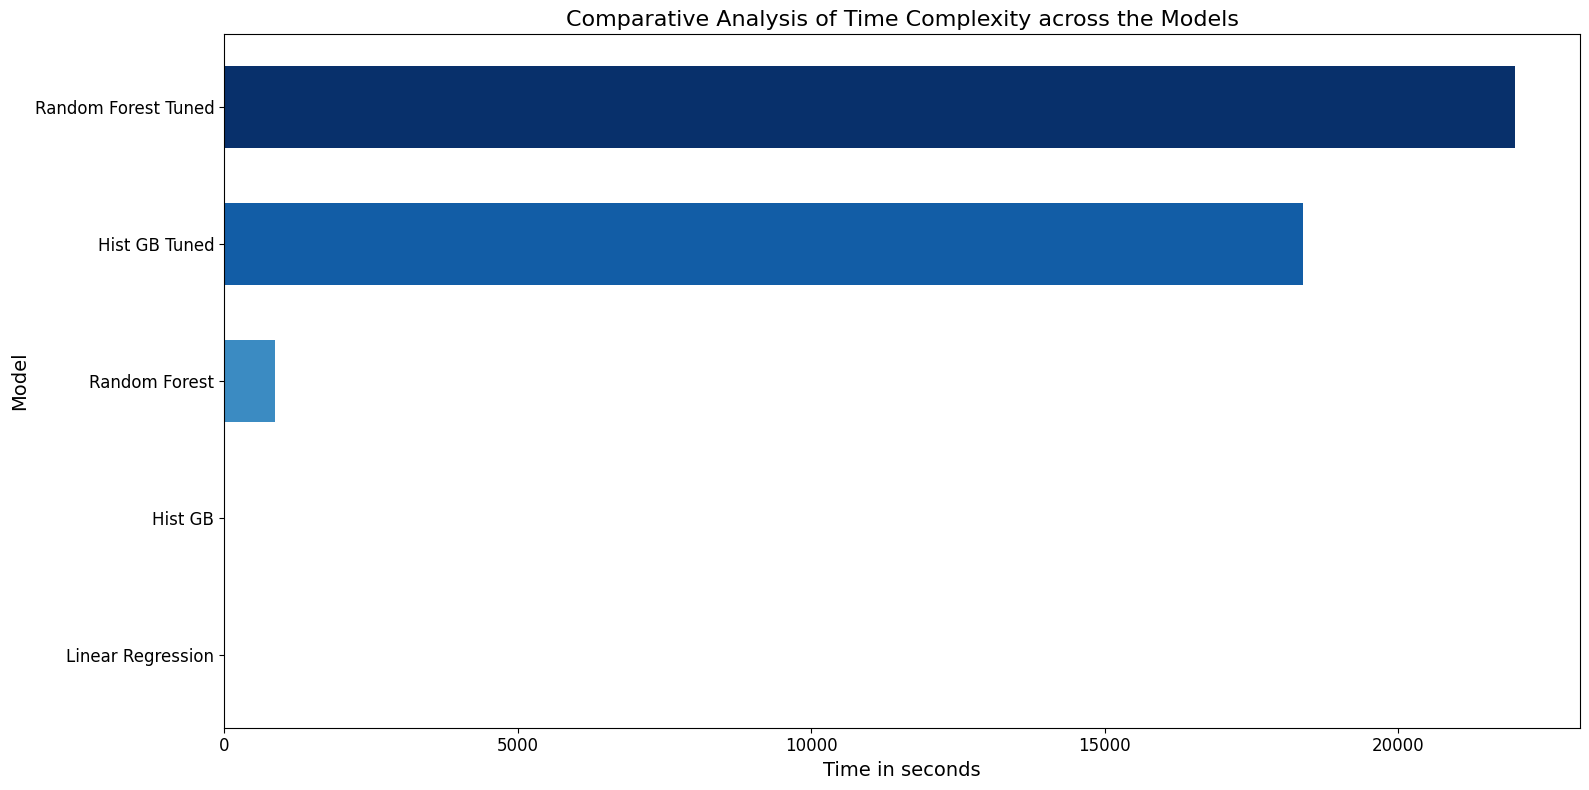

In [401]:
models = {
    'Linear Regression': linear_reg_time,
    'Random Forest': rf_untuned_time,
    'Random Forest Tuned': rf_tuned_time,
    'Hist GB': hist_gb_untuned_time,
    'Hist GB Tuned': hist_gb_tuned_time
}

model_names = list(models.keys())
execution_times = list(models.values())

sorted_models = sorted(zip(model_names, execution_times), key=lambda x: x[1])

sorted_model_names, sorted_execution_times = zip(*sorted_models)

colors = plt.cm.Blues(np.linspace(0.3, 1, len(sorted_model_names)))

plt.figure(figsize=(16, 8))
plt.barh(sorted_model_names, sorted_execution_times, color=colors, height=0.6)  
plt.xlabel('Time in seconds', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Comparative Analysis of Time Complexity across the Models', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Comparative Performance Analysis of Regression Models on MAE, RMSE and R^2 Metrics 🔬

/var/folders/sr/745f1rfd0ps3pldxc18yfr3h0000gn/T/ipykernel_15128/2523316219.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Algorithm", x="MAE", data=df_metrics.sort_values(by="MAE", ascending=False), palette="Greens_d")
/var/folders/sr/745f1rfd0ps3pldxc18yfr3h0000gn/T/ipykernel_15128/2523316219.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Algorithm", x="RMSE", data=df_metrics.sort_values(by="RMSE", ascending=False), palette="Oranges_d")
/var/folders/sr/745f1rfd0ps3pldxc18yfr3h0000gn/T/ipykernel_15128/2523316219.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=

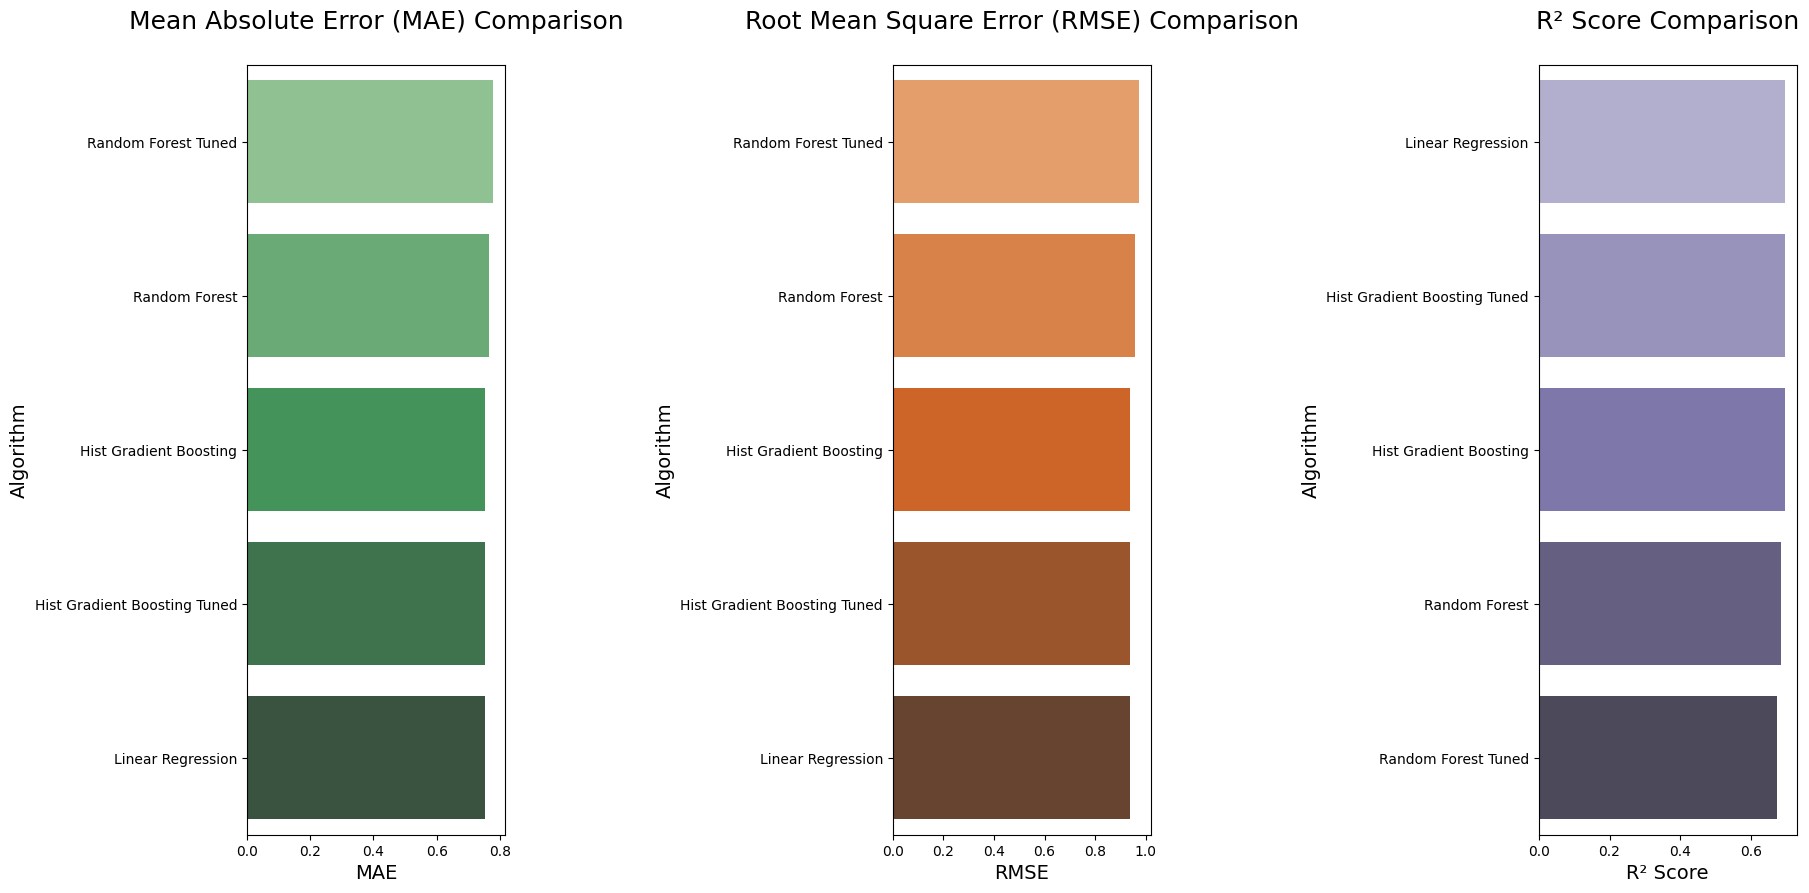

In [415]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics = {
    "Algorithm": [
        "Linear Regression",
        "Random Forest",
        "Random Forest Tuned",
        "Hist Gradient Boosting",
        "Hist Gradient Boosting Tuned",
    ],

    "MAE": [
        lin_reg_mae_test,
        rf_reg_mae_test,
        random_search_mae_test,
        hist_gb_model_mae_test,
        hist_gb_tuned_mae_test,
    ],

    "RMSE": [
        lin_reg_rmse_test,
        rf_reg_rmse_test,
        random_search_rmse_test,
        hist_gb_model_rmse_test,
        hist_gb_tuned_rmse_test,
    ],
    
    "R2 Score": [
        lin_reg_r_test,
        rf_reg_r_test,
        random_search_r_test,
        hist_gb_model_r_test,
        hist_gb_tuned_r_test,
    ],
}

# Converting to DataFrame for easier plotting
df_metrics = pd.DataFrame(metrics)

plt.figure(figsize=(20, 10))

# MAE Plot
plt.subplot(1, 3, 1)
sns.barplot(y="Algorithm", x="MAE", data=df_metrics.sort_values(by="MAE", ascending=False), palette="Greens_d")
plt.title("Mean Absolute Error (MAE) Comparison\n", fontsize=18)
plt.xlabel("MAE", fontsize=14)
plt.ylabel("Algorithm", fontsize=14)

# RMSE Plot
plt.subplot(1, 3, 2)
sns.barplot(y="Algorithm", x="RMSE", data=df_metrics.sort_values(by="RMSE", ascending=False), palette="Oranges_d")
plt.title("Root Mean Square Error (RMSE) Comparison\n", fontsize=18)
plt.xlabel("RMSE", fontsize=14)
plt.ylabel("Algorithm", fontsize=14)

# R2 Score Plot
plt.subplot(1, 3, 3)
sns.barplot(y="Algorithm", x="R2 Score", data=df_metrics.sort_values(by="R2 Score", ascending=False), palette="Purples_d")
plt.title("R² Score Comparison\n", fontsize=18)
plt.xlabel("R² Score", fontsize=14)
plt.ylabel("Algorithm", fontsize=14)

plt.subplots_adjust(wspace=1.5)
# Display the plot
plt.show()


# Conclusion 🖊️

Upon evaluating the performance of various predictive models using key metrics such as **MAE**, **R² score**, and **RMSE**, a clear trend emerges, underscoring the superior performance of the **Linear Regression** algorithm. 

According to the **MAE** comparison chart, Linear Regression exhibits the lowest MAE, signifying the highest accuracy in its predictions. The smaller the MAE value, the better the model’s predictions, as they are closer to the actual values. Hist Gradient Boosting Tuned follows closely behind. In contrast, Random Forest shows the highest MAE, suggesting relatively lower accuracy.

The **R²** score comparison further reinforces Linear Regression's dominance, not only showing the best performance but also indicating strong predictive power. The higher the R² value, the better the model explains the variance of the target variable, and in this case, Linear Regression excels in this regard. 

Similarly, the **RMSE** analysis reveals Linear Regression with the lowest score, reaffirming its leading position. A lower RMSE indicates better model performance, as it reflects smaller deviations from the actual values.


In summary, the Linear Regression algorithm consistently outperforms all other models across the three key metrics, while Random Forest Tuned emerges as the least effective model according to these evaluations. This highlights the importance of selecting the right model based on performance metrics for accurate and reliable predictions. The consistent top performance of Linear Regression across all metrics positions it as the most reliable choice in this study, demonstrating its superior predictive capabilities when applied to the dataset at hand.